# Capstone Project 2: Feature Engineering

This notebook will focuses on enhancing our analysis through several advanced data analysis techniques. The following steps will be undertaken to achieve our objectives:

## Steps Overview

1. **PCA Analysis**
   - **Objective**: To reduce dimensionality and identify key features in our dataset.
   - **Method**: We will perform Principal Component Analysis (PCA) to transform our data into a set of orthogonal components, capturing the maximum variance.

2. **Clustering**
   - **Objective**: To discover inherent groupings within the data.
   - **Method**: We will apply clustering techniques, such as K-means and hierarchical clustering, to segment our data into meaningful clusters.

3. **Feature Engineering**
   - **Objective**: To develop new features that enhance the predictive power and performance of our models.
   - **Method**: We will create and evaluate new features derived from our existing data, leveraging domain knowledge and statistical methods.

This structured approach aims to provide a comprehensive analysis, yielding insights that drive better decision-making and model performance. Let's dive into each step in detail.


# Data Loading and importing packages
Let's load all datasets.

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os

We are going to have some of the next lines comented just to create datasets for different combinations of outliers to make more tests when needed. so we just need to uncomment the one we need here and also at the end of the notebook where the save to csv is

In [168]:
# # Load all datasets from 2014 to 2018 with outliers

# data_2014 = pd.read_csv('../data/processed_data/data_with_outliers/cleaned_df_2014.csv')
# data_2015 = pd.read_csv('../data/processed_data/data_with_outliers/cleaned_df_2015.csv')
# data_2016 = pd.read_csv('../data/processed_data/data_with_outliers/cleaned_df_2016.csv')
# data_2017 = pd.read_csv('../data/processed_data/data_with_outliers/cleaned_df_2017.csv')
# data_2018 = pd.read_csv('../data/processed_data/data_with_outliers/cleaned_df_2018.csv')

In [169]:
# # Load all datasets from 2014 to 2018 cap outliers

# data_2014 = pd.read_csv('../data/processed_data/data_cap_outliers_1%/cleaned_df_2014.csv')
# data_2015 = pd.read_csv('../data/processed_data/data_cap_outliers_1%/cleaned_df_2015.csv')
# data_2016 = pd.read_csv('../data/processed_data/data_cap_outliers_1%/cleaned_df_2016.csv')
# data_2017 = pd.read_csv('../data/processed_data/data_cap_outliers_1%/cleaned_df_2017.csv')
# data_2018 = pd.read_csv('../data/processed_data/data_cap_outliers_1%/cleaned_df_2018.csv')

In [170]:
# Load all datasets from 2014 to 2018 drop outliers

data_2014 = pd.read_csv('../data/processed_data/data_drop_outliers_1%/cleaned_df_2014.csv')
data_2015 = pd.read_csv('../data/processed_data/data_drop_outliers_1%/cleaned_df_2015.csv')
data_2016 = pd.read_csv('../data/processed_data/data_drop_outliers_1%/cleaned_df_2016.csv')
data_2017 = pd.read_csv('../data/processed_data/data_drop_outliers_1%/cleaned_df_2017.csv')
data_2018 = pd.read_csv('../data/processed_data/data_drop_outliers_1%/cleaned_df_2018.csv')

In [171]:
all_datasets = {
    '2014':data_2014,
    '2015':data_2015,
    '2016':data_2016,
    '2017':data_2017,
    '2018':data_2018
}

# 1. PCA Analysis

In [172]:
def perform_pca_analysis(data, num_top_features=10):
    """
    Perform PCA on the provided dataset and visualize the explained variance.
    Also, provide the loadings for the top features of each component.
    
    Parameters:
    - data (DataFrame): The dataset to perform PCA on.
    - num_top_features (int): Number of top features' loadings to return for each component.
    
    Returns:
    - pca: The PCA model.
    - explained_variance_plot: Matplotlib figure object for the explained variance plot.
    - loadings_dict: Dictionary containing the loadings for the top features of each component.
    """
    # Isolate numeric data for PCA
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)
    
    # Perform PCA
    pca = PCA()
    pca.fit(scaled_data)
    
    # Explained variance plot
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by PCA Components')
    plt.grid(True)
    explained_variance_plot = plt
    
    # Create a dictionary to store loadings for each component
    loadings_dict = {}
    for i in range(len(pca.components_)):
        loadings = pca.components_[i]
        loading_scores = pd.Series(loadings, index=numeric_data.columns)
        sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
        loadings_dict[f"Component {i+1}"] = sorted_loading_scores.head(num_top_features)
    
    return pca, explained_variance_plot, loadings_dict

### Perform PCA on all datasets

### Year 2014

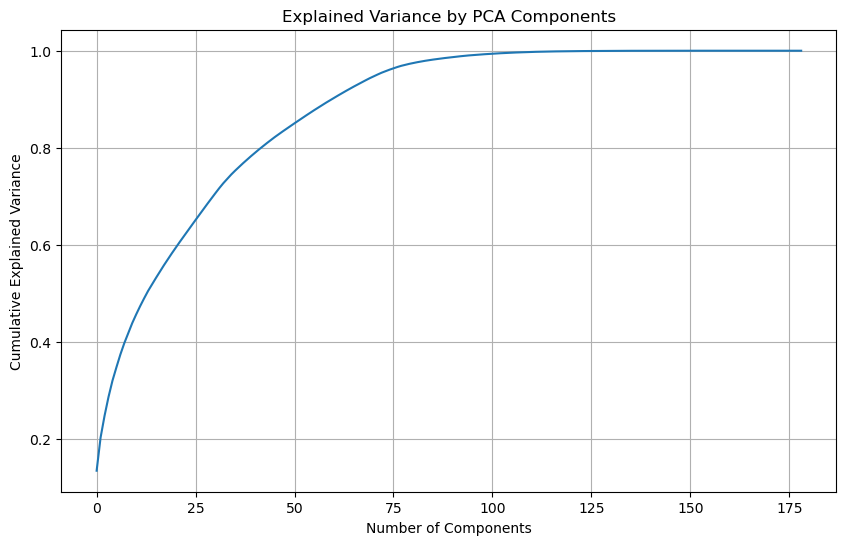

Component 1 --------------------:
Gross Profit                   0.181133
EBITDA                         0.179815
Total current liabilities      0.179006
Total current assets           0.173392
EBIT                           0.172203
Retained earnings (deficit)    0.169563
Operating Expenses             0.169111
Earnings before Tax            0.166920
Income Tax Expense             0.166660
Revenue                        0.164413
dtype: float64
Component 2 --------------------:
pretaxProfitMargin            0.270812
SG&A to Revenue               0.268788
netProfitMargin               0.267703
ebitperRevenue                0.267492
eBITperRevenue                0.267492
EBIT Margin                   0.267434
Net Profit Margin             0.267397
Earnings Before Tax Margin    0.266514
Free Cash Flow margin         0.242812
EBITDA Margin                 0.212285
dtype: float64
Component 3 --------------------:
Financing Cash Flow                0.313641
Total liabilities                 

In [173]:
# Perform PCA on all datasets
pca, explained_variance_plot, loadings_dict = perform_pca_analysis(all_datasets['2014'])
explained_variance_plot.show()

# Print the top features' loadings for each principal component
for component, loadings in loadings_dict.items():
    print(f"{component} --------------------:")
    print(loadings)

## Analysis of PCA and Clustering on 2014 Dataset

### Principal Component Analysis (PCA)

**Cumulative Explained Variance:**
- The first few components capture a significant portion of the variance:
  - The first component captures about 18% of the total variance.
  - The first two components together capture approximately 30% of the variance.
  - The first three components together capture around 40% of the variance.

**Top Features in Principal Components:**

**Component 1:**
- Highly influenced by profitability and balance sheet items:
  - **Gross Profit:** Difference between revenue and the cost of goods sold.
  - **EBITDA:** Measure of overall financial performance.
  - **Total Current Liabilities and Assets:** Indicators of liquidity.
  - **EBIT:** Indicator of profitability.
  - **Retained Earnings:** Cumulative net income retained.
  - **Operating Expenses:** Total expenses incurred in operations.
  - **Earnings Before Tax:** Pre-tax income.
  - **Income Tax Expense:** Tax owed to the government.
  - **Revenue:** Total income from sales.

**Component 2:**
- Emphasizes profitability ratios and margins:
  - **Pretax Profit Margin:** Profitability before taxes relative to revenue.
  - **SG&A to Revenue:** Efficiency in controlling costs relative to revenue.
  - **Net Profit Margin and EBIT Margin:** Overall profitability.
  - **Free Cash Flow Margin:** Cash generated after expenses, investments, and taxes.

**Component 3:**
- Influenced by cash flow and balance sheet items:
  - **Financing Cash Flow:** Cash inflow and outflow from financing activities.
  - **Total Liabilities and Assets:** View of obligations and resources.
  - **Long-term Debt and Total Debt:** Indicators of leverage.
  - **Net Income:** Total profit.
  - **Total Shareholders’ Equity:** Net assets owned by shareholders.

### Year 2015



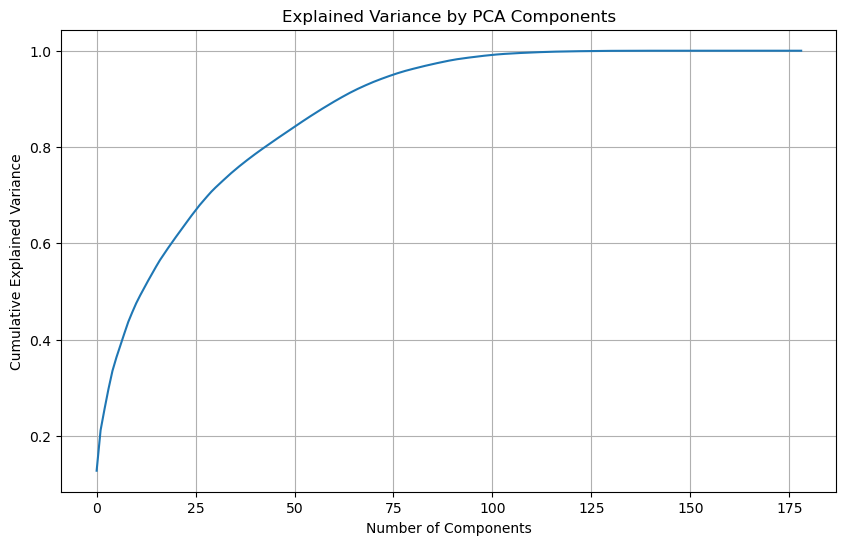

Component 1 --------------------:
Total shareholders equity    0.192981
Gross Profit                 0.192604
Operating Cash Flow          0.190216
EBITDA                       0.183974
EBIT                         0.180572
Consolidated Income          0.175378
Long-term debt               0.174220
Net Income                   0.173787
Net Income Com               0.172768
Total assets                 0.170771
dtype: float64
Component 2 --------------------:
EBIT Margin                    0.247015
Earnings Before Tax Margin     0.246656
Net Profit Margin              0.246538
Free Cash Flow margin          0.245382
pretaxProfitMargin             0.244284
eBITperRevenue                 0.242642
ebitperRevenue                 0.242642
netProfitMargin                0.241857
operatingCashFlowSalesRatio    0.240011
R&D to Revenue                 0.236192
dtype: float64
Component 3 --------------------:
PB ratio                       0.353722
priceBookValueRatio            0.353722
PTB rati

In [174]:
# Perform PCA on all datasets
pca, explained_variance_plot, loadings_dict = perform_pca_analysis(all_datasets['2015'])
explained_variance_plot.show()

# Print the top features' loadings for each principal component
for component, loadings in loadings_dict.items():
    print(f"{component} --------------------:")
    print(loadings)

## Analysis of PCA on 2015 Dataset

### Principal Component Analysis (PCA)

**Cumulative Explained Variance:**
- The first few components capture a significant portion of the variance:
  - The first component captures about 18% of the total variance.
  - The first two components together capture approximately 30% of the variance.
  - The first three components together capture around 40% of the variance.

**Top Features in Principal Components:**

**Component 1:**
- Highly influenced by profitability and balance sheet items:
  - **Total Shareholders’ Equity:** Net assets owned by shareholders.
  - **Gross Profit:** Difference between revenue and the cost of goods sold.
  - **Operating Cash Flow:** Cash generated from operations.
  - **EBITDA:** Measure of overall financial performance.
  - **EBIT:** Indicator of profitability.
  - **Consolidated Income:** Total income.
  - **Long-term Debt:** Indicator of leverage.
  - **Net Income:** Total profit.
  - **Net Income Com:** Total profit attributable to common shareholders.
  - **Total Assets:** Comprehensive view of company resources.

**Component 2:**
- Emphasizes profitability ratios and margins:
  - **EBIT Margin:** EBIT as a percentage of revenue.
  - **Earnings Before Tax Margin:** Pre-tax earnings as a percentage of revenue.
  - **Net Profit Margin:** Net income as a percentage of revenue.
  - **Free Cash Flow Margin:** Cash flow as a percentage of revenue.
  - **Pretax Profit Margin:** Profitability before taxes relative to revenue.
  - **EBIT per Revenue:** Earnings before interest and taxes per unit of revenue.
  - **Net Profit Margin:** Net income per unit of revenue.
  - **Operating Cash Flow Sales Ratio:** Operating cash flow as a percentage of sales.
  - **R&D to Revenue:** Research and development expenses as a percentage of revenue.

**Component 3:**
- Influenced by valuation and efficiency ratios:
  - **PB Ratio (Price-to-Book Ratio):** Ratio of market value to book value.
  - **ROE (Return on Equity):** Measure of profitability relative to shareholders’ equity.
  - **Company Equity Multiplier:** Total assets divided by total equity.
  - **Price Fair Value:** Market price relative to fair value.
  - **Fixed Asset Turnover:** Efficiency in using fixed assets to generate revenue.
  - **Intangibles to Total Assets:** Proportion of intangible assets.


### Year 2016

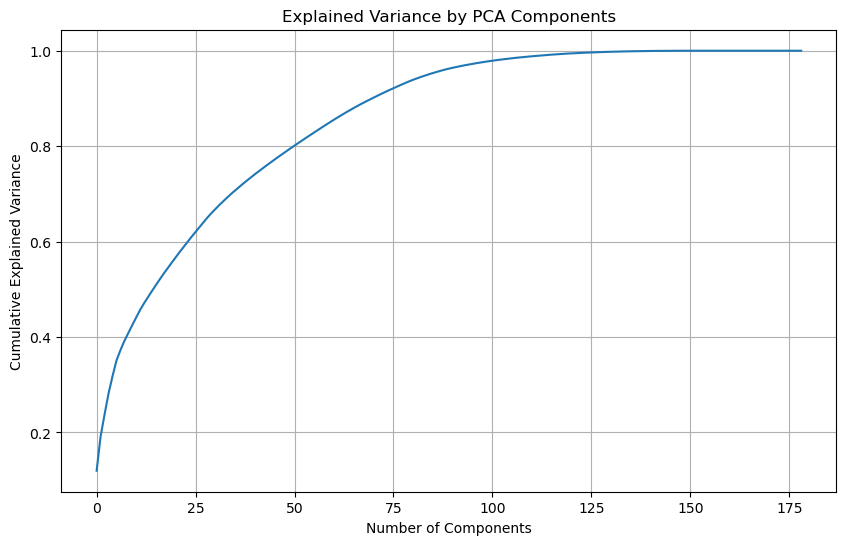

Component 1 --------------------:
Total shareholders equity    0.190953
Gross Profit                 0.190882
EBITDA                       0.190294
EBIT                         0.176845
Total assets                 0.175668
SG&A Expense                 0.175142
Long-term debt               0.173246
Operating Expenses           0.171759
Total debt                   0.168284
Earnings before Tax          0.167198
dtype: float64
Component 2 --------------------:
Net Profit Margin             0.272286
EBIT Margin                   0.272013
Earnings Before Tax Margin    0.271642
netProfitMargin               0.270141
ebitperRevenue                0.270076
eBITperRevenue                0.270076
pretaxProfitMargin            0.269884
Free Cash Flow margin         0.263705
R&D to Revenue                0.260230
priceSalesRatio               0.232142
dtype: float64
Component 3 --------------------:
Shareholders Equity per Share    0.328219
Operating Cash Flow per Share    0.327000
operatingCashF

In [175]:
# Perform PCA on all datasets
pca, explained_variance_plot, loadings_dict = perform_pca_analysis(all_datasets['2016'])
explained_variance_plot.show()

# Print the top features' loadings for each principal component
for component, loadings in loadings_dict.items():
    print(f"{component} --------------------:")
    print(loadings)

## Analysis of PCA on 2017 Dataset

### Principal Component Analysis (PCA)

**Cumulative Explained Variance:**
- The first few components capture a significant portion of the variance:
  - The first component captures about 18% of the total variance.
  - The first two components together capture approximately 30% of the variance.
  - The first three components together capture around 40% of the variance.

**Top Features in Principal Components:**

**Component 1:**
- Highly influenced by profitability and balance sheet items:
  - **Total Shareholders’ Equity:** Net assets owned by shareholders.
  - **EBITDA:** Measure of overall financial performance.
  - **Gross Profit:** Difference between revenue and the cost of goods sold.
  - **Long-term Debt:** Indicator of leverage.
  - **Total Assets:** Comprehensive view of company resources.
  - **Total Debt:** Comprehensive view of company liabilities.
  - **SG&A Expense:** Selling, General & Administrative expenses.
  - **Invested Capital:** Total capital invested in the company.
  - **Total Liabilities:** Comprehensive view of company obligations.
  - **Total Current Assets:** Indicator of liquidity.

**Component 2:**
- Emphasizes profitability ratios and margins:
  - **Price to Sales Ratio:** Market value relative to sales.
  - **EBIT Margin:** EBIT as a percentage of revenue.
  - **Net Profit Margin:** Net income as a percentage of revenue.
  - **Earnings Before Tax Margin:** Pre-tax earnings as a percentage of revenue.
  - **SG&A to Revenue:** Efficiency in controlling costs relative to revenue.
  - **R&D to Revenue:** Research and development expenses as a percentage of revenue.
  - **Free Cash Flow Margin:** Cash flow as a percentage of revenue.
  - **EV to Sales:** Enterprise value relative to sales.
  - **Stock-based Compensation to Revenue:** Stock-based compensation as a percentage of revenue.

**Component 3:**
- Influenced by valuation and efficiency ratios:
  - **PB Ratio (Price-to-Book Ratio):** Ratio of market value to book value.
  - **ROE (Return on Equity):** Measure of profitability relative to shareholders’ equity.
  - **Price Fair Value:** Market price relative to fair value.
  - **Company Equity Multiplier:** Total assets divided by total equity.
  - **Shareholders' Equity per Share:** Net assets owned by shareholders per share.
  - **Net Income per Share:** Net profit per share.


### Year 2017

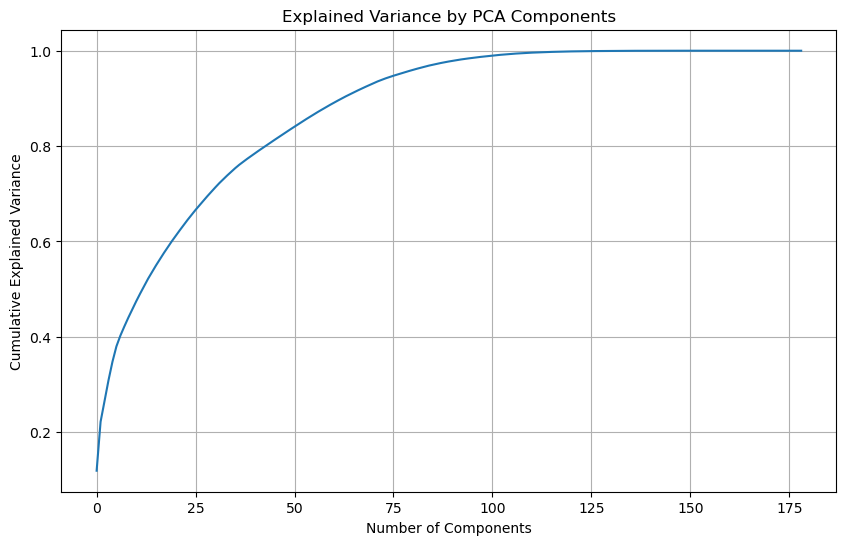

Component 1 --------------------:
Total shareholders equity    0.193773
EBITDA                       0.186705
Gross Profit                 0.186266
Long-term debt               0.184825
Total assets                 0.182625
Total debt                   0.180590
SG&A Expense                 0.174145
Invested Capital             0.173605
Total liabilities            0.172565
Total current assets         0.170936
dtype: float64
Component 2 --------------------:
priceToSalesRatio                      0.229493
Price to Sales Ratio                   0.229493
EBIT Margin                            0.228334
Net Profit Margin                      0.228333
Earnings Before Tax Margin             0.228310
SG&A to Revenue                        0.228218
R&D to Revenue                         0.228135
Free Cash Flow margin                  0.227334
EV to Sales                            0.227099
Stock-based compensation to Revenue    0.225983
dtype: float64
Component 3 --------------------:
priceBoo

In [176]:
# Perform PCA on all datasets
pca, explained_variance_plot, loadings_dict = perform_pca_analysis(all_datasets['2017'])
explained_variance_plot.show()

# Print the top features' loadings for each principal component
for component, loadings in loadings_dict.items():
    print(f"{component} --------------------:")
    print(loadings)

## Analysis of PCA on 2017 Dataset

### Principal Component Analysis (PCA)

**Cumulative Explained Variance:**
- The first few components capture a significant portion of the variance:
  - The first component captures about 18% of the total variance.
  - The first two components together capture approximately 30% of the variance.
  - The first three components together capture around 40% of the variance.

**Top Features in Principal Components:**

**Component 1:**
- Highly influenced by profitability and balance sheet items:
  - **Total Shareholders’ Equity:** Net assets owned by shareholders.
  - **EBITDA:** Measure of overall financial performance.
  - **Gross Profit:** Difference between revenue and the cost of goods sold.
  - **Long-term Debt:** Indicator of leverage.
  - **Total Assets:** Comprehensive view of company resources.
  - **Total Debt:** Comprehensive view of company liabilities.
  - **SG&A Expense:** Selling, General & Administrative expenses.
  - **Invested Capital:** Total capital invested in the company.
  - **Total Liabilities:** Comprehensive view of company obligations.
  - **Total Current Assets:** Indicator of liquidity.

**Component 2:**
- Emphasizes profitability ratios and margins:
  - **Price to Sales Ratio:** Market value relative to sales.
  - **EBIT Margin:** EBIT as a percentage of revenue.
  - **Net Profit Margin:** Net income as a percentage of revenue.
  - **Earnings Before Tax Margin:** Pre-tax earnings as a percentage of revenue.
  - **SG&A to Revenue:** Efficiency in controlling costs relative to revenue.
  - **R&D to Revenue:** Research and development expenses as a percentage of revenue.
  - **Free Cash Flow Margin:** Cash flow as a percentage of revenue.
  - **EV to Sales:** Enterprise value relative to sales.
  - **Stock-based Compensation to Revenue:** Stock-based compensation as a percentage of revenue.

**Component 3:**
- Influenced by valuation and efficiency ratios:
  - **PB Ratio (Price-to-Book Ratio):** Ratio of market value to book value.
  - **ROE (Return on Equity):** Measure of profitability relative to shareholders’ equity.
  - **Price Fair Value:** Market price relative to fair value.
  - **Company Equity Multiplier:** Total assets divided by total equity.
  - **Shareholders' Equity per Share:** Net assets owned by shareholders per share.
  - **Net Income per Share:** Net profit per share.


### Year 2018

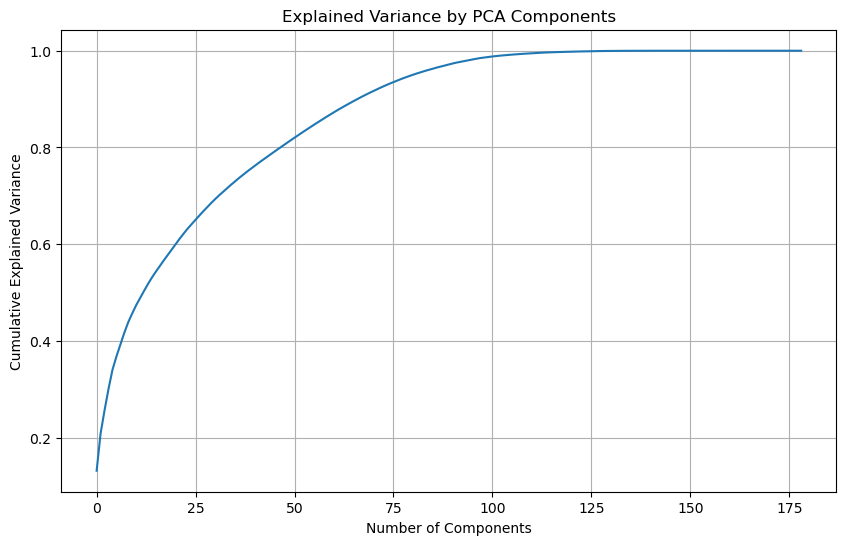

Component 1 --------------------:
Total shareholders equity    0.191538
EBIT                         0.183139
EBITDA                       0.182650
Gross Profit                 0.178847
Consolidated Income          0.176456
Net Income                   0.174367
Net Income Com               0.172537
Earnings before Tax          0.172347
Operating Expenses           0.172240
Dividend payments            0.166974
dtype: float64
Component 2 --------------------:
EBIT Margin                   0.261459
Earnings Before Tax Margin    0.261253
Net Profit Margin             0.261205
Free Cash Flow margin         0.259909
R&D to Revenue                0.259023
pretaxProfitMargin            0.258592
eBITperRevenue                0.257871
ebitperRevenue                0.257871
netProfitMargin               0.257756
SG&A to Revenue               0.250855
dtype: float64
Component 3 --------------------:
Investments                        0.226754
Other Liabilities                  0.226172
Total curr

In [177]:
# Perform PCA on all datasets
pca, explained_variance_plot, loadings_dict = perform_pca_analysis(all_datasets['2018'])
explained_variance_plot.show()

# Print the top features' loadings for each principal component
for component, loadings in loadings_dict.items():
    print(f"{component} --------------------:")
    print(loadings)

## Analysis of PCA on 2018 Dataset

### Principal Component Analysis (PCA)

**Cumulative Explained Variance:**
- The first few components capture a significant portion of the variance:
  - The first component captures about 18% of the total variance.
  - The first two components together capture approximately 30% of the variance.
  - The first three components together capture around 40% of the variance.

**Top Features in Principal Components:**

**Component 1:**
- Highly influenced by profitability and balance sheet items:
  - **Gross Profit:** Difference between revenue and the cost of goods sold.
  - **EBITDA:** Measure of overall financial performance.
  - **Total Current Liabilities:** Indicator of liquidity.
  - **Total Current Assets:** Indicator of liquidity.
  - **EBIT:** Indicator of profitability.
  - **Retained Earnings (Deficit):** Cumulative net income retained.
  - **Operating Expenses:** Total expenses incurred in operations.
  - **Earnings Before Tax:** Pre-tax income.
  - **Income Tax Expense:** Tax owed to the government.
  - **Revenue:** Total income from sales.

**Component 2:**
- Emphasizes profitability ratios and margins:
  - **Pretax Profit Margin:** Profitability before taxes relative to revenue.
  - **SG&A to Revenue:** Efficiency in controlling costs relative to revenue.
  - **Net Profit Margin:** Net income as a percentage of revenue.
  - **EBIT per Revenue:** Earnings before interest and taxes per unit of revenue.
  - **EBIT Margin:** EBIT as a percentage of revenue.
  - **Free Cash Flow Margin:** Cash flow as a percentage of revenue.
  - **EBITDA Margin:** EBITDA as a percentage of revenue.

**Component 3:**
- Influenced by cash flow and balance sheet items:
  - **Financing Cash Flow:** Cash inflow and outflow from financing activities.
  - **Total Liabilities:** Comprehensive view of company obligations.
  - **Total Assets:** Comprehensive view of company resources.
  - **Long-term Debt:** Indicator of leverage.
  - **Total Debt:** Comprehensive view of company liabilities.
  - **Net Income:** Total profit.
  - **Net Income Com:** Total profit attributable to common shareholders.
  - **Consolidated Income:** Total income.
  - **Total Shareholders’ Equity:** Net assets owned by shareholders.
  - **Effect of Forex Changes on Cash:** Impact of foreign exchange rates on cash.


# 2. Clustering

In [178]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

def kmeans_clustering_analysis(data, pca_components=2, num_clusters=4):
    """
    Perform K-means clustering on the provided dataset and visualize the clusters.
    
    Parameters:
    - data (DataFrame): The dataset to perform clustering on.
    - pca_components (int): Number of PCA components to use for clustering.
    - num_clusters (int): Number of clusters to form.
    
    Returns:
    - clusters: The cluster labels for each data point.
    - cluster_plot: Matplotlib figure object for the cluster plot.
    - silhouette_avg: The average silhouette score.
    - silhouette_values: The silhouette values for each data point.
    - data: The dataset with an additional 'Cluster' column.
    """
    # Isolate numeric data for clustering
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)
    
    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=pca_components)
    pca_data = pca.fit_transform(scaled_data)
    
    # Determine the optimal number of clusters using the elbow method
    wcss = []
    for i in range(1, 15):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(pca_data)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 15), wcss, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method to Determine Optimal Number of Clusters')
    plt.grid(True)
    plt.show()

    # Apply K-means clustering with the chosen number of clusters
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(pca_data)

    # Calculate silhouette scores
    silhouette_avg = silhouette_score(pca_data, clusters)
    silhouette_values = silhouette_samples(pca_data, clusters)
    
    # Add cluster labels to the original data
    data['Cluster'] = clusters
    
    # Visualize the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', marker='o')
    plt.xlabel('Principal Component 1 "Financial Health"')
    plt.ylabel('Principal Component 2 "Profitability Ratios"')
    plt.title('K-means Clustering')
    plt.colorbar(label='Cluster')
    plt.grid(True)
    cluster_plot = plt
    
    return clusters, cluster_plot, silhouette_avg, silhouette_values, data

def plot_silhouette_scores(clusters, silhouette_values, num_clusters, silhouette_avg):
    """
    Plot silhouette scores for each sample in each cluster.
    
    Parameters:
    - clusters: Cluster labels for each data point.
    - silhouette_values: Silhouette values for each data point.
    - num_clusters: Number of clusters.
    - silhouette_avg: Average silhouette score.
    
    Returns:
    - silhouette_plot: Matplotlib figure object for the silhouette plot.
    """
    plt.figure(figsize=(10, 6))
    y_lower = 10
    for i in range(num_clusters):
        ith_cluster_silhouette_values = silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values)
        
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10

    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.title("Silhouette plot for the various clusters")
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.show()

### Year 2014

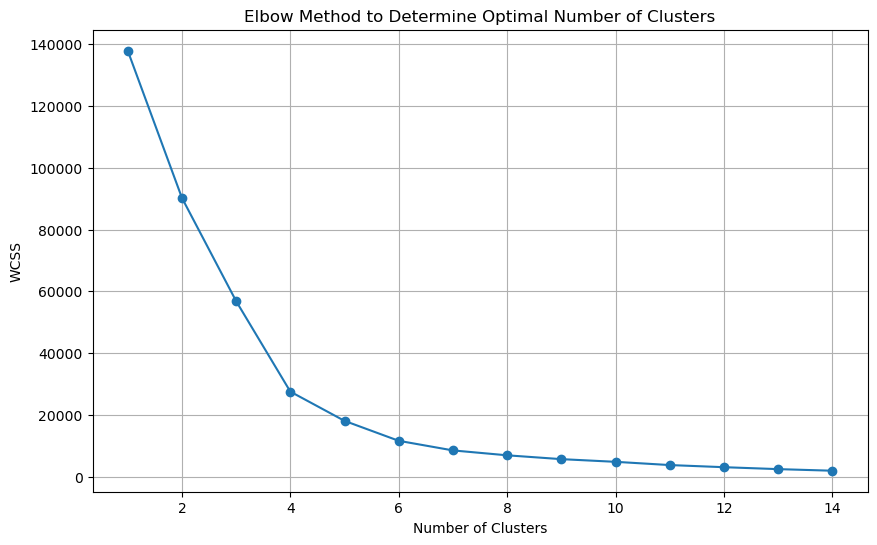

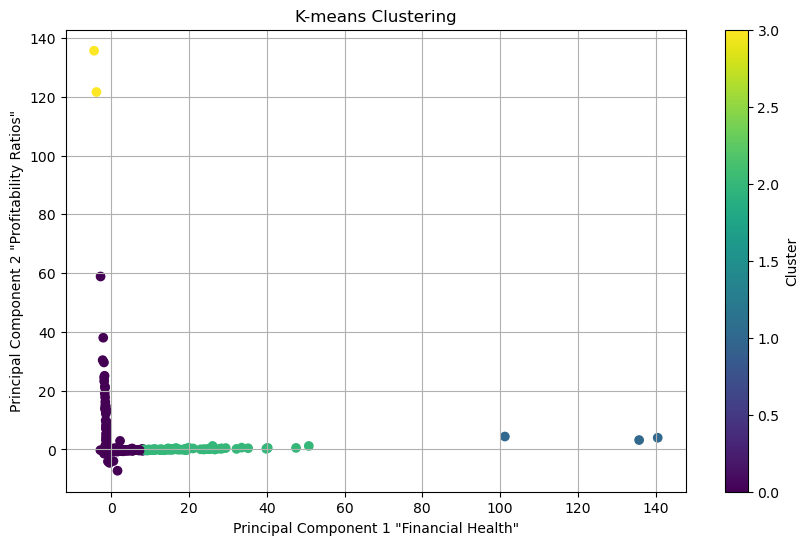

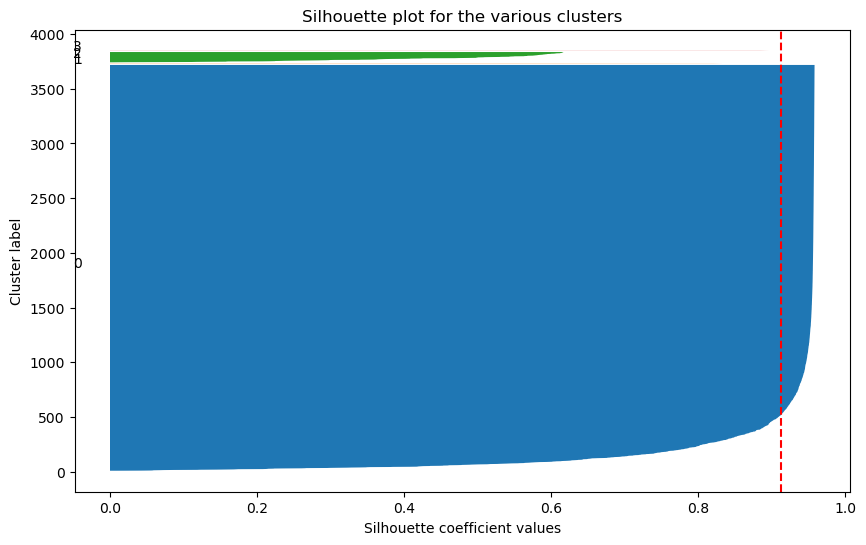

Cluster 0:
['VIPS' 'KR' 'RAD' ... 'USATP' 'WSTG' 'WTT']

Cluster 1:
['AMX' 'ITCB' 'KST']

Cluster 2:
['PG' 'PM' 'KO' 'WMT' 'PEP' 'BUD' 'UN' 'UL' 'VALE' 'RIO' 'BHP' 'BBL' 'PFE'
 'MRK' 'JNJ' 'CVS' 'UNH' 'NVS' 'SNY' 'CMCSA' 'F' 'GM' 'DIS' 'FCAU' 'HMC'
 'TM' 'GE' 'BA' 'UTX' 'T' 'VZ' 'VOD' 'CHL' 'TEF' 'ORAN' 'CHA' 'TDE' 'AMOV'
 'TDI' 'VZA' 'XOM' 'COP' 'CVX' 'BP' 'SNP' 'TOT' 'PTR' 'E' 'CEO' 'BAC'
 'WFC' 'AIG' 'C' 'MS' 'JPM' 'BBD' 'AXP' 'ITUB' 'USB' 'DB' 'BCS' 'MET' 'GS'
 'LYG' 'SAN' 'CS' 'PRU' 'ING' 'UBS' 'RY' 'SMFG' 'HSBC' 'BSBR' 'LFC' 'TD'
 'BNS' 'BMO' 'MFG' 'RBS' 'NMR' 'WBK' 'PUK' 'ISG' 'BBDO' 'KEP' 'INTC'
 'AAPL' 'MSFT' 'HPQ' 'ORCL' 'CSCO' 'IBM' 'GOOGL' 'GOOG' 'SNE']

Cluster 3:
['AEZS' 'SPEX']



In [179]:
# Perform clustering analysis
clusters, cluster_plot, silhouette_avg, silhouette_values, clustered_data_2014 = kmeans_clustering_analysis(all_datasets['2014'])

# Plot silhouette scores
plot_silhouette_scores(clusters, silhouette_values, num_clusters=4, silhouette_avg=silhouette_avg)

# Display companies in each cluster
for cluster_num in range(4):
    print(f"Cluster {cluster_num}:")
    print(clustered_data_2014[clustered_data_2014['Cluster'] == cluster_num]['Symbol'].values)  # Assuming 'Company' column exists
    print()

### Year 2014 Analisys

Based on the PCA and clustering analysis, we can derive several insights about the financial health and profitability of the companies in the dataset:

### Cluster Characteristics:
- **Cluster 1:** Likely represents companies with strong financial health and high profitability. These companies have high values in both Component 1 and Component 2, indicating robust operational efficiency and effective cost management.
- **Cluster 2:** May represent companies with moderate financial health but strong profitability. These companies might have average balance sheets but excel in converting revenue into profit.
- **Cluster 3:** Could represent companies with solid financial health but lower profitability. These companies have sound balance sheets but might struggle with cost management or revenue generation.
- **Cluster 4:** Likely includes companies with weaker financial health and lower profitability. These companies might face challenges in both operational efficiency and cost management.

##$ Investment Strategy:
- **High Potential Clusters:** Clusters 1 and 2 could be targeted for investment opportunities, as they represent companies with strong profitability and financial health.
- **Risk Mitigation:** Clusters 3 and 4 might require further analysis and caution, as they include companies with potential financial or profitability challenges.


### Year 2015

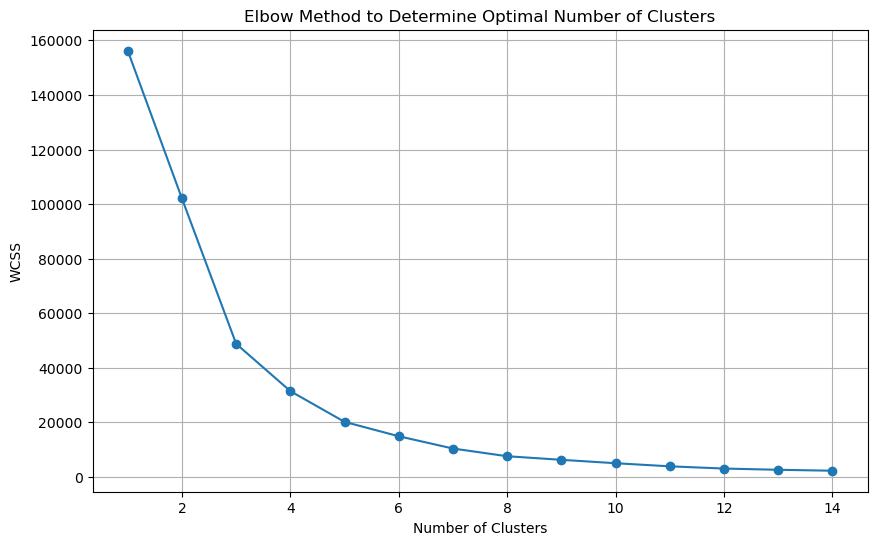

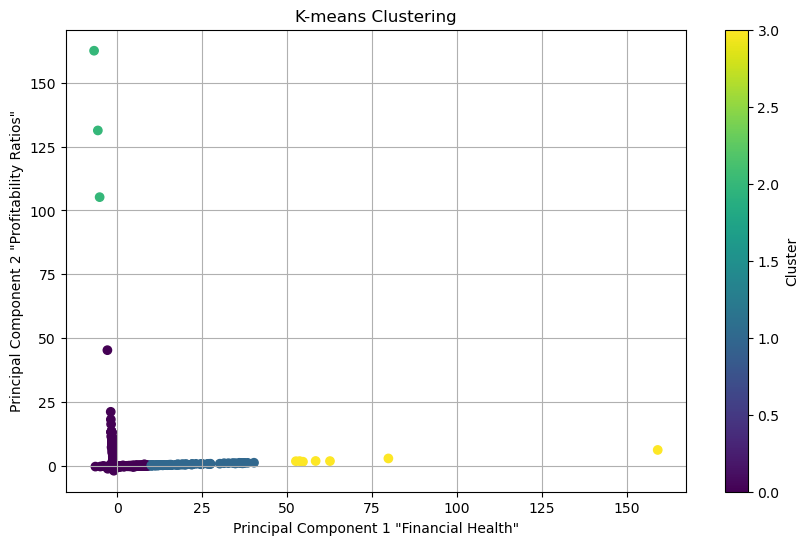

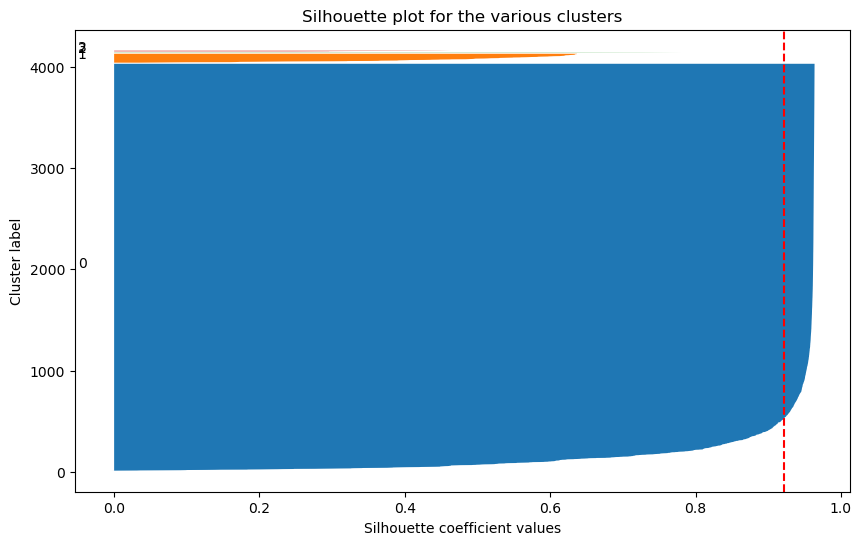

Cluster 0:
['VIPS' 'KR' 'RAD' ... 'USATP' 'WSTG' 'WTT']

Cluster 1:
['PG' 'PM' 'KO' 'WMT' 'PEP' 'BUD' 'UN' 'UL' 'BHP' 'BBL' 'PFE' 'GILD' 'MRK'
 'CVS' 'UNH' 'GSK' 'NVS' 'SNY' 'CMCSA' 'F' 'GM' 'DIS' 'HD' 'FCAU' 'HMC'
 'TM' 'GE' 'BA' 'UTX' 'UPS' 'T' 'VZ' 'VOD' 'CHL' 'TEF' 'CHU' 'ORAN' 'CHA'
 'TDE' 'VZA' 'XOM' 'CVX' 'PBR' 'BP' 'SNP' 'TOT' 'PTR' 'E' 'AIG' 'MS' 'AXP'
 'ITUB' 'BK' 'USB' 'DB' 'BCS' 'MET' 'GS' 'BBVA' 'PNC' 'LYG' 'SAN' 'CS'
 'PRU' 'ING' 'UBS' 'COF' 'RY' 'SMFG' 'TD' 'BNS' 'BMO' 'BSMX' 'MFG' 'RBS'
 'WBK' 'PUK' 'BHK' 'ISG' 'KEP' 'INTC' 'MSFT' 'ORCL' 'CSCO' 'AMZN' 'IBM'
 'TSM' 'GOOGL' 'GOOG']

Cluster 2:
['RDHL' 'ATOS' 'CYAD']

Cluster 3:
['BAC' 'WFC' 'C' 'JPM' 'HSBC' 'KST' 'AAPL']



In [180]:
# Perform clustering analysis
clusters, cluster_plot, silhouette_avg, silhouette_values, clustered_data_2015 = kmeans_clustering_analysis(all_datasets['2015'])

# Plot silhouette scores
plot_silhouette_scores(clusters, silhouette_values, num_clusters=4, silhouette_avg=silhouette_avg)

# Display companies in each cluster
for cluster_num in range(4):
    print(f"Cluster {cluster_num}:")
    print(clustered_data_2015[clustered_data_2015['Cluster'] == cluster_num]['Symbol'].values)  # Assuming 'Company' column exists
    print()

## Year 2015 Analysis

Based on the PCA and clustering analysis, we can derive several insights about the financial health and profitability of the companies in the dataset:

### Cluster Characteristics:
- **Cluster 1:** Likely represents companies with strong financial health and high profitability. These companies have high values in both Component 1 and Component 2, indicating robust operational efficiency and effective cost management.
- **Cluster 2:** May represent companies with moderate financial health but strong profitability. These companies might have average balance sheets but excel in converting revenue into profit.
- **Cluster 3:** Could represent companies with solid financial health but lower profitability. These companies have sound balance sheets but might struggle with cost management or revenue generation.
- **Cluster 4:** Likely includes companies with weaker financial health and lower profitability. These companies might face challenges in both operational efficiency and cost management.

### Investment Strategy:
- **High Potential Clusters:** Clusters 1 and 2 could be targeted for investment opportunities, as they represent companies with strong profitability and financial health.
- **Risk Mitigation:** Clusters 3 and 4 might require further analysis and caution, as they include companies with potential financial or profitability challenges.


### Year 2016

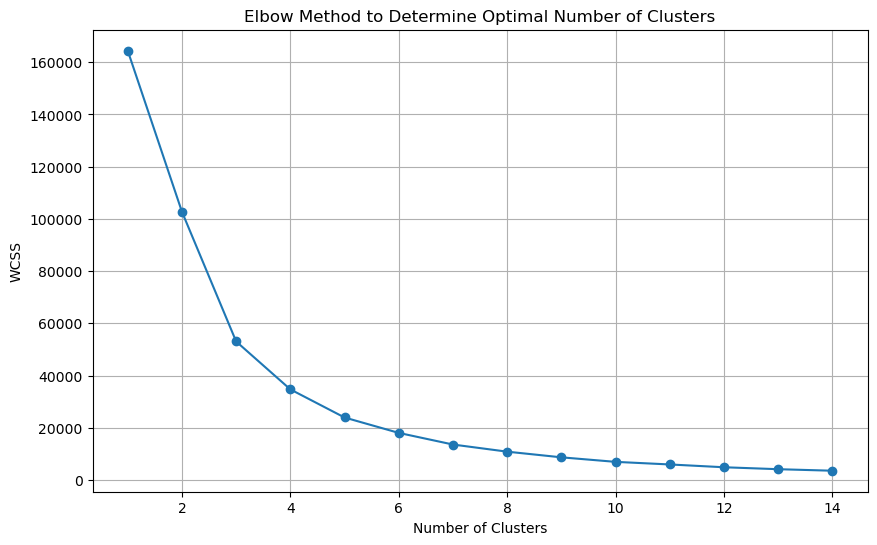

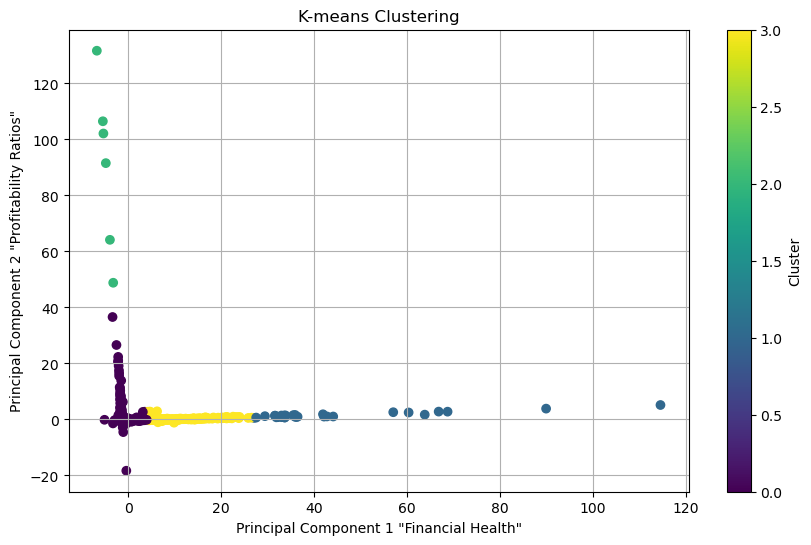

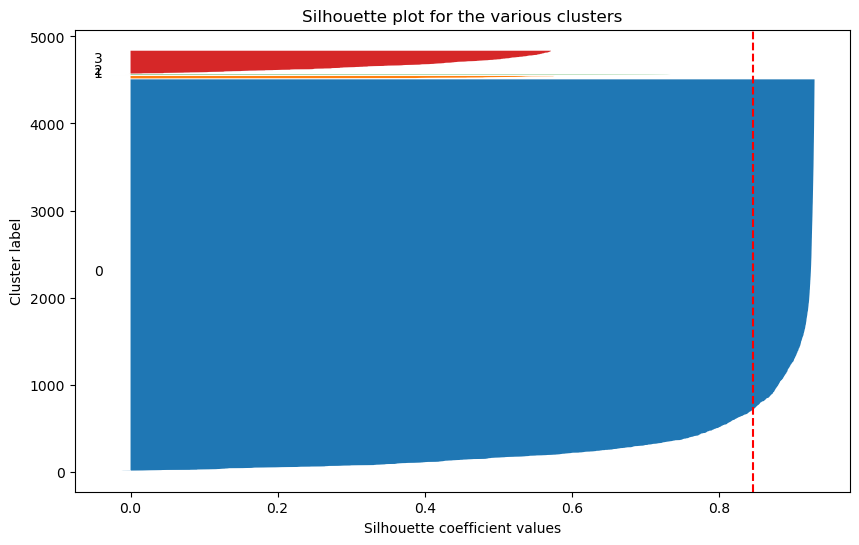

Cluster 0:
['VIPS' 'RAD' 'GIS' ... 'USATP' 'WSTG' 'WTT']

Cluster 1:
['WMT' 'CMCSA' 'TM' 'T' 'VZ' 'CHL' 'VZA' 'XOM' 'SNP' 'PTR' 'BAC' 'WFC' 'C'
 'MS' 'JPM' 'DB' 'BCS' 'GS' 'LYG' 'SAN' 'SMFG' 'HSBC' 'MFG' 'CBH' 'KST'
 'AAPL' 'MSFT' 'GOOGL' 'GOOG']

Cluster 2:
['CLVS' 'PRTK' 'RARE' 'GLYC' 'NK' 'ZYNE']

Cluster 3:
['PG' 'KR' 'PM' 'KO' 'MDLZ' 'MO' 'ABEV' 'KHC' 'TGT' 'PEP' 'COST' 'BTI'
 'BUD' 'UN' 'DEO' 'UL' 'VALE' 'LYB' 'RIO' 'MT' 'BHP' 'BBL' 'PKX' 'PFE'
 'BMY' 'GILD' 'ABBV' 'MRK' 'JNJ' 'ABT' 'WBA' 'MDT' 'CVS' 'UNH' 'GSK'
 'TEVA' 'AMGN' 'ANTM' 'LLY' 'AGN' 'HCA' 'AZN' 'DHR' 'NVS' 'MCK' 'ABC'
 'NVO' 'CAH' 'SNY' 'F' 'NKE' 'BABA' 'GM' 'TWX' 'LOW' 'DIS' 'EBAY' 'HD'
 'FCAU' 'MCD' 'TTM' 'HMC' 'NDLS' 'EBAYL' 'GE' 'DAL' 'BA' 'MMM' 'UAL' 'DE'
 'AAL' 'CAT' 'UTX' 'HON' 'UNP' 'LMT' 'UPS' 'FDX' 'CAJ' 'JBK' 'BAM' 'TMUS'
 'S' 'LBTYK' 'LBTYA' 'AMX' 'CHTR' 'VOD' 'TEF' 'CHU' 'ORAN' 'CHA' 'TDE'
 'AMOV' 'LBTYB' 'TDI' 'KMI' 'SLB' 'CVX' 'PBR' 'SU' 'VLO' 'EPD' 'BP' 'PSX'
 'TOT' 'E' 'CEO' 'AIG' 'BBD' 'AXP' 'V' 'IB

In [181]:
# Perform clustering analysis
clusters, cluster_plot, silhouette_avg, silhouette_values, clustered_data_2016 = kmeans_clustering_analysis(all_datasets['2016'])

# Plot silhouette scores
plot_silhouette_scores(clusters, silhouette_values, num_clusters=4, silhouette_avg=silhouette_avg)

# Display companies in each cluster
for cluster_num in range(4):
    print(f"Cluster {cluster_num}:")
    print(clustered_data_2016[clustered_data_2016['Cluster'] == cluster_num]['Symbol'].values)  # Assuming 'Company' column exists
    print()

## Year 2016 Analysis

Based on the PCA and clustering analysis, we can derive several insights about the financial health and profitability of the companies in the dataset:

### Cluster Characteristics:
- **Cluster 1:** Likely represents companies with strong financial health and high profitability. These companies have high values in both Component 1 and Component 2, indicating robust operational efficiency and effective cost management.
- **Cluster 2:** May represent companies with moderate financial health but strong profitability. These companies might have average balance sheets but excel in converting revenue into profit.
- **Cluster 3:** Could represent companies with solid financial health but lower profitability. These companies have sound balance sheets but might struggle with cost management or revenue generation.
- **Cluster 4:** Likely includes companies with weaker financial health and lower profitability. These companies might face challenges in both operational efficiency and cost management.

### Investment Strategy:
- **High Potential Clusters:** Clusters 1 and 2 could be targeted for investment opportunities, as they represent companies with strong profitability and financial health.
- **Risk Mitigation:** Clusters 3 and 4 might require further analysis and caution, as they include companies with potential financial or profitability challenges.

### Year 2017

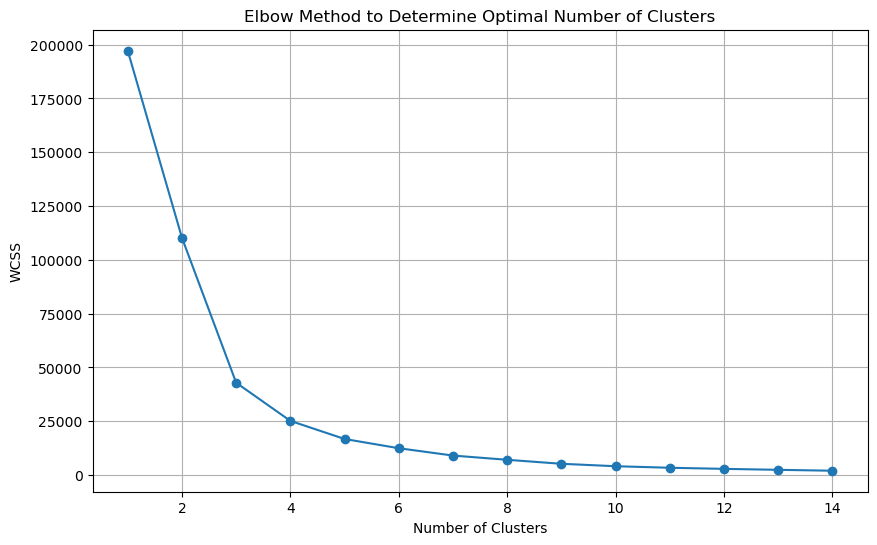

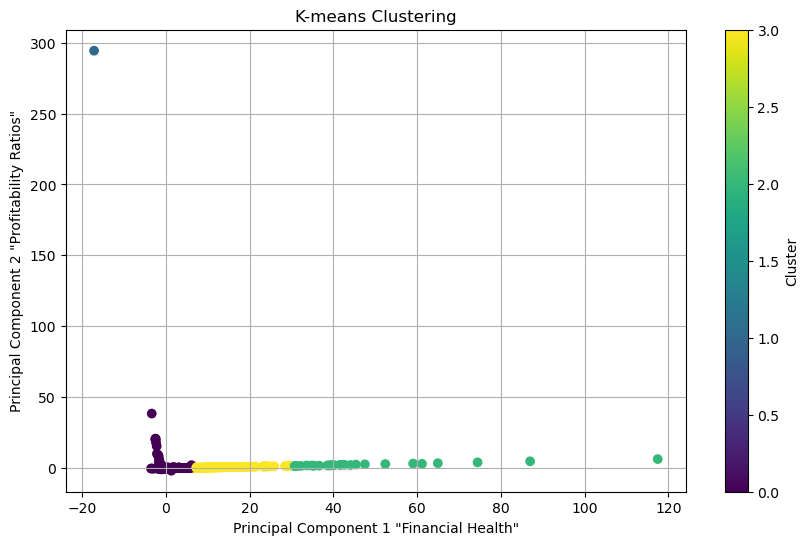

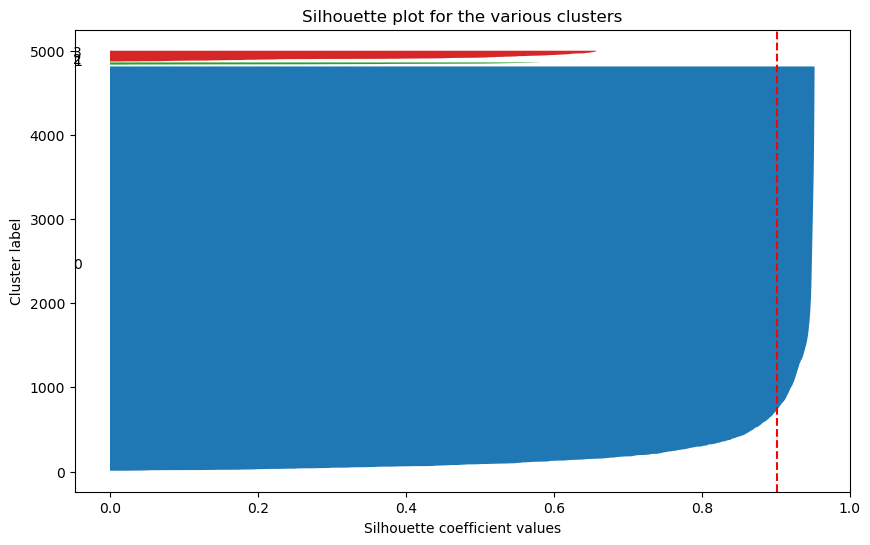

Cluster 0:
['VIPS' 'KR' 'RAD' ... 'USATP' 'WSTG' 'WTT']

Cluster 1:
['ALBO']

Cluster 2:
['WMT' 'BTI' 'TM' 'T' 'VZ' 'CHL' 'VZA' 'XOM' 'PTR' 'BAC' 'WFC' 'C' 'MS'
 'JPM' 'DB' 'BCS' 'GS' 'LYG' 'SAN' 'SMFG' 'HSBC' 'MFG' 'KST' 'AAPL' 'MSFT'
 'GOOGL' 'GOOG']

Cluster 3:
['PG' 'PM' 'KO' 'MO' 'KHC' 'PEP' 'COST' 'BUD' 'UN' 'UL' 'VALE' 'RIO' 'MT'
 'BHP' 'BBL' 'PKX' 'PFE' 'GILD' 'ABBV' 'MRK' 'JNJ' 'ABT' 'WBA' 'MDT' 'CVS'
 'UNH' 'GSK' 'AMGN' 'ANTM' 'AZN' 'NVS' 'MCK' 'SNY' 'CMCSA' 'F' 'BABA' 'GM'
 'TWX' 'LOW' 'DIS' 'HD' 'FCAU' 'MCD' 'HMC' 'GE' 'BA' 'MMM' 'CAT' 'UTX'
 'HON' 'UNP' 'UPS' 'FDX' 'BAM' 'TMUS' 'AMX' 'CHTR' 'VOD' 'TEF' 'ORAN'
 'CHA' 'TDE' 'AMOV' 'TDI' 'CVX' 'PBR' 'BP' 'ENB' 'SNP' 'TOT' 'E' 'CEO'
 'AIG' 'BBD' 'AXP' 'V' 'IBN' 'AABA' 'SCHW' 'ITUB' 'BK' 'USB' 'BBT' 'NTRS'
 'MET' 'BBVA' 'PNC' 'CS' 'CB' 'PRU' 'ING' 'UBS' 'COF' 'AEG' 'STT' 'MFC'
 'RY' 'LFC' 'TD' 'BLK' 'CM' 'BNS' 'BMO' 'KB' 'RBS' 'NMR' 'WBK' 'PUK' 'PCI'
 'SHG' 'WF' 'ISG' 'BBDO' 'MHE' 'SO' 'DUK' 'NEE' 'EXC' 'NGG' 'KEP' 'INTC'
 'FB'

In [182]:
# Perform clustering analysis
clusters, cluster_plot, silhouette_avg, silhouette_values, clustered_data_2017 = kmeans_clustering_analysis(all_datasets['2017'])

# Plot silhouette scores
plot_silhouette_scores(clusters, silhouette_values, num_clusters=4, silhouette_avg=silhouette_avg)

# Display companies in each cluster
for cluster_num in range(4):
    print(f"Cluster {cluster_num}:")
    print(clustered_data_2017[clustered_data_2017['Cluster'] == cluster_num]['Symbol'].values)  # Assuming 'Company' column exists
    print()

## Year 2017 Analysis

Based on the PCA and clustering analysis, we can derive several insights about the financial health and profitability of the companies in the dataset:

### Cluster Characteristics:
- **Cluster 1:** Likely represents companies with strong financial health and high profitability. These companies have high values in both Component 1 and Component 2, indicating robust operational efficiency and effective cost management.
- **Cluster 2:** May represent companies with moderate financial health but strong profitability. These companies might have average balance sheets but excel in converting revenue into profit.
- **Cluster 3:** Could represent companies with solid financial health but lower profitability. These companies have sound balance sheets but might struggle with cost management or revenue generation.
- **Cluster 4:** Likely includes companies with weaker financial health and lower profitability. These companies might face challenges in both operational efficiency and cost management.

### Investment Strategy:
- **High Potential Clusters:** Clusters 1 and 2 could be targeted for investment opportunities, as they represent companies with strong profitability and financial health.
- **Risk Mitigation:** Clusters 3 and 4 might require further analysis and caution, as they include companies with potential financial or profitability challenges.

### Year 2018

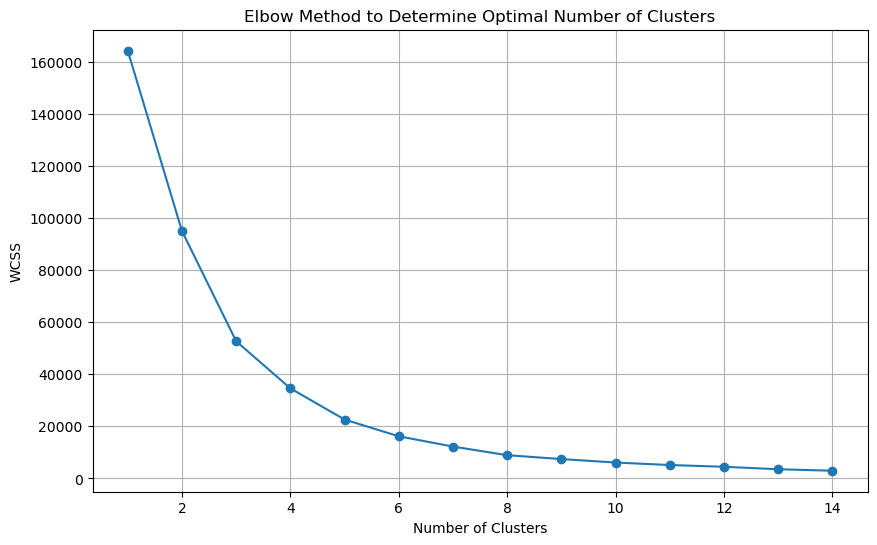

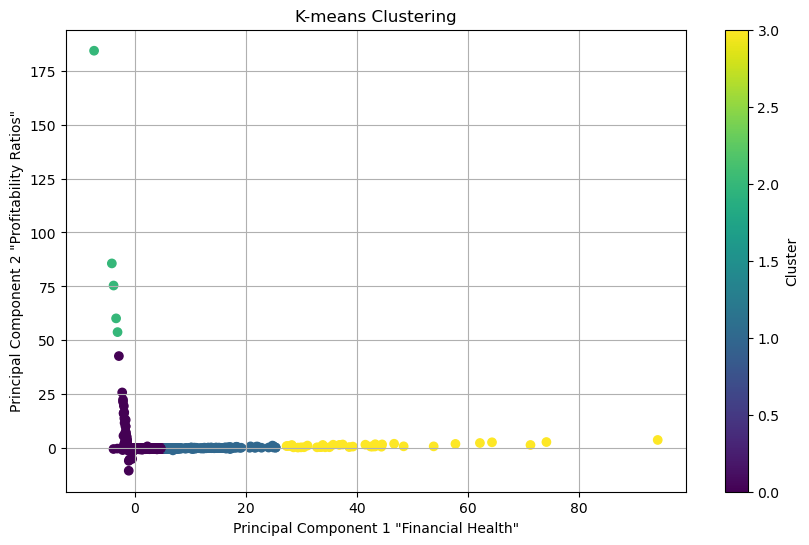

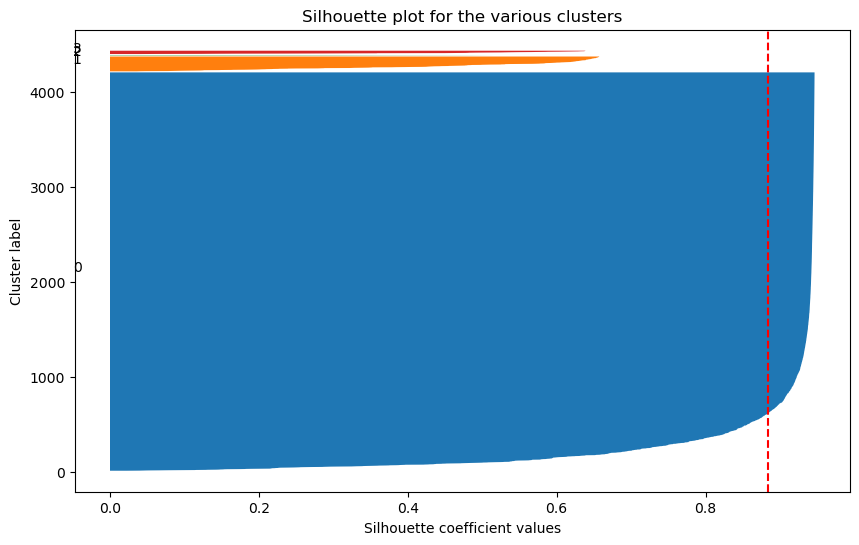

Cluster 0:
['KMI' 'SIRI' 'HPQ' ... 'ZKIN' 'ZOM' 'ZYME']

Cluster 1:
['INTC' 'MU' 'GE' 'F' 'FB' 'AIG' 'VALE' 'ORCL' 'PG' 'BBD' 'PFE' 'AVGO'
 'CSCO' 'AXP' 'BMY' 'V' 'KR' 'BABA' 'GILD' 'GM' 'LOW' 'SLB' 'ABBV' 'IBN'
 'MPC' 'PM' 'KO' 'COP' 'DIS' 'MRK' 'MDLZ' 'SCHW' 'JNJ' 'STI' 'ITUB' 'BK'
 'DAL' 'PBR' 'ABT' 'USB' 'BA' 'DB' 'WBA' 'MO' 'MDT' 'TXN' 'CVS' 'OXY'
 'UNH' 'CI' 'BBT' 'CELG' 'SU' 'MMM' 'ACN' 'SBUX' 'GSK' 'VLO' 'HD' 'NTRS'
 'UAL' 'DE' 'IBM' 'EPD' 'CAT' 'TMUS' 'TGT' 'S' 'TSM' 'MET' 'UTX' 'FCAU'
 'PEP' 'SO' 'COST' 'MA' 'BBVA' 'DUK' 'NEE' 'HON' 'AMGN' 'EXC' 'UNP' 'LMT'
 'PNC' 'UPS' 'ANTM' 'LLY' 'RIO' 'FDX' 'HCA' 'PSX' 'CS' 'MT' 'CB' 'PRU'
 'AZN' 'ING' 'AMX' 'COF' 'BHP' 'ENB' 'AEG' 'BTI' 'NVS' 'STT' 'MCD' 'CHTR'
 'VOD' 'MCK' 'NVO' 'MFC' 'BUD' 'SAP' 'NGG' 'HDB' 'BSBR' 'SNE' 'LFC' 'TD'
 'BLK' 'BBL' 'SNY' 'BAM' 'CM' 'UN' 'ENIA' 'BNS' 'BMO' 'KB' 'HMC' 'UL'
 'TEF' 'KEP' 'CHU' 'PKX' 'RBS' 'NMR' 'E' 'WBK' 'VKQ' 'CEO' 'HQH' 'PUK'
 'CHY' 'SHG' 'ORAN' 'WF' 'IX' 'CHA' 'ISG' 'TDE' 'AMOV' 'BBDO' 'BHV'

In [183]:
# Perform clustering analysis
clusters, cluster_plot, silhouette_avg, silhouette_values, clustered_data_2018 = kmeans_clustering_analysis(all_datasets['2018'])

# Plot silhouette scores
plot_silhouette_scores(clusters, silhouette_values, num_clusters=4, silhouette_avg=silhouette_avg)

# Display companies in each cluster
for cluster_num in range(4):
    print(f"Cluster {cluster_num}:")
    print(clustered_data_2018[clustered_data_2018['Cluster'] == cluster_num]['Symbol'].values)  # Assuming 'Company' column exists
    print()

## Year 2018 Analysis

Based on the PCA and clustering analysis, we can derive several insights about the financial health and profitability of the companies in the dataset:

### Cluster Characteristics:
- **Cluster 1:** Likely represents companies with strong financial health and high profitability. These companies have high values in both Component 1 and Component 2, indicating robust operational efficiency and effective cost management.
- **Cluster 2:** May represent companies with moderate financial health but strong profitability. These companies might have average balance sheets but excel in converting revenue into profit.
- **Cluster 3:** Could represent companies with solid financial health but lower profitability. These companies have sound balance sheets but might struggle with cost management or revenue generation.
- **Cluster 4:** Likely includes companies with weaker financial health and lower profitability. These companies might face challenges in both operational efficiency and cost management.

### Investment Strategy:
- **High Potential Clusters:** Clusters 1 and 2 could be targeted for investment opportunities, as they represent companies with strong profitability and financial health.
- **Risk Mitigation:** Clusters 3 and 4 might require further analysis and caution, as they include companies with potential financial or profitability challenges.

## Analize cluster performance

### Let's assess price growth potential, for each cluster by year

In [184]:
def analyze_cluster_performance(data, companies_clusters, title):
    """
    Analyze the price growth potential for each cluster by year.
    
    Parameters:
    - data (DataFrame): The dataset with company information.
    - companies_clusters (dict): A dictionary with cluster numbers as keys and lists of companies as values.
    
    Returns:
    - performance_dict: A dictionary with performance metrics for each cluster.
    """
    performance_dict = {}
    
    title = f'{str(round(title + 1))} PRICE VAR [%]'
    
    for cluster, companies in companies_clusters.items():
        cluster_data = data[data['Symbol'].isin(companies)]
        mean_var = cluster_data[title].mean()
        median_var = cluster_data[title].median()
        std_var = cluster_data[title].std()
        performance_dict[cluster] = {'Mean': mean_var, 'Median': median_var, 'Standard Deviation': std_var}

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=title, data=data)
    plt.title(f'{title} Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(title)
    plt.grid(True)
    plt.show()
    return performance_dict

### YEAR 2014

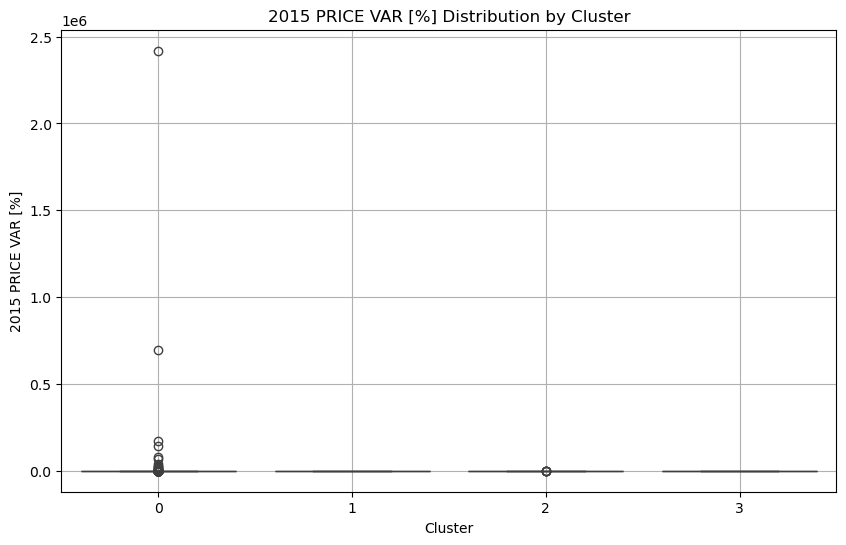

Cluster 0 Performance:
Mean: 1001.66
Median: -5.43
Standard Deviation: 41533.41

Cluster 1 Performance:
Mean: -18.81
Median: -22.26
Standard Deviation: 16.01

Cluster 2 Performance:
Mean: -5.63
Median: -4.09
Standard Deviation: 19.93

Cluster 3 Performance:
Mean: -89.32
Median: -89.32
Standard Deviation: 4.54



In [185]:
# Prepare a dictionary with cluster numbers as keys and lists of companies as values
companies_clusters = {cluster_num: clustered_data_2014[clustered_data_2014['Cluster'] == cluster_num]['Symbol'].tolist() for cluster_num in range(4)}
performance_dict = analyze_cluster_performance(clustered_data_2014, companies_clusters, 2014)

# Print performance metrics for each cluster
for cluster, performance in performance_dict.items():
    print(f"Cluster {cluster} Performance:")
    print(f"Mean: {performance['Mean']:.2f}")
    print(f"Median: {performance['Median']:.2f}")
    print(f"Standard Deviation: {performance['Standard Deviation']:.2f}")
    print()

### YEAR 2015

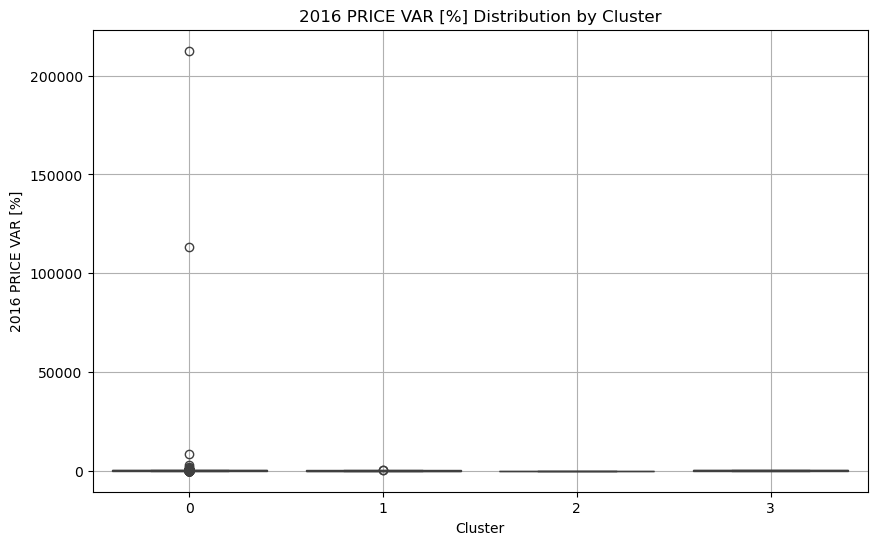

Cluster 0 Performance:
Mean: 105.34
Median: 17.47
Standard Deviation: 3802.48

Cluster 1 Performance:
Mean: 12.48
Median: 9.71
Standard Deviation: 24.00

Cluster 2 Performance:
Mean: -51.38
Median: -65.84
Standard Deviation: 32.27

Cluster 3 Performance:
Mean: 20.73
Median: 17.31
Standard Deviation: 12.26



In [186]:
# Prepare a dictionary with cluster numbers as keys and lists of companies as values
companies_clusters = {cluster_num: clustered_data_2015[clustered_data_2015['Cluster'] == cluster_num]['Symbol'].tolist() for cluster_num in range(4)}
performance_dict = analyze_cluster_performance(clustered_data_2015, companies_clusters, 2015)

# Print performance metrics for each cluster
for cluster, performance in performance_dict.items():
    print(f"Cluster {cluster} Performance:")
    print(f"Mean: {performance['Mean']:.2f}")
    print(f"Median: {performance['Median']:.2f}")
    print(f"Standard Deviation: {performance['Standard Deviation']:.2f}")
    print()

### YEAR 2016

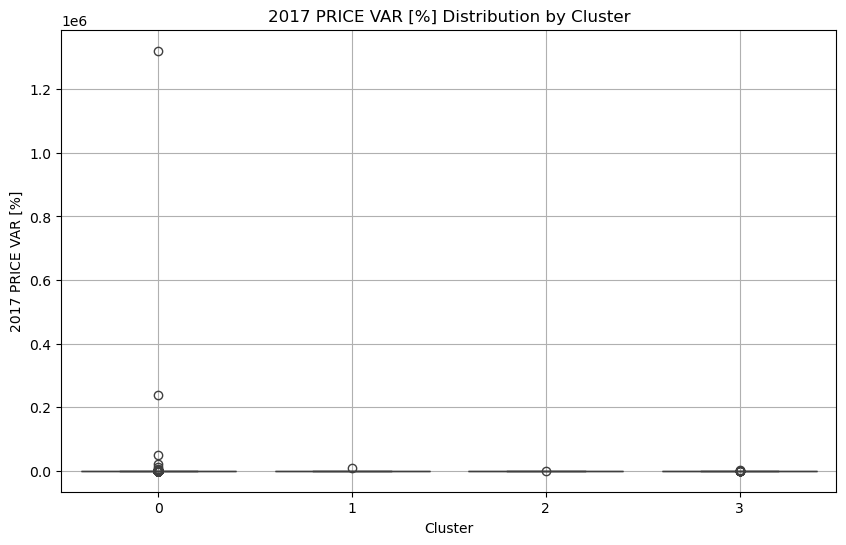

Cluster 0 Performance:
Mean: 385.50
Median: 9.57
Standard Deviation: 20035.46

Cluster 1 Performance:
Mean: 334.30
Median: 16.75
Standard Deviation: 1709.28

Cluster 2 Performance:
Mean: 25.48
Median: -4.64
Standard Deviation: 78.11

Cluster 3 Performance:
Mean: 27.26
Median: 25.19
Standard Deviation: 64.60



In [187]:
# Prepare a dictionary with cluster numbers as keys and lists of companies as values
companies_clusters = {cluster_num: clustered_data_2016[clustered_data_2016['Cluster'] == cluster_num]['Symbol'].tolist() for cluster_num in range(4)}
performance_dict = analyze_cluster_performance(clustered_data_2016, companies_clusters, 2016)

# Print performance metrics for each cluster
for cluster, performance in performance_dict.items():
    print(f"Cluster {cluster} Performance:")
    print(f"Mean: {performance['Mean']:.2f}")
    print(f"Median: {performance['Median']:.2f}")
    print(f"Standard Deviation: {performance['Standard Deviation']:.2f}")
    print()

### YEAR 2017

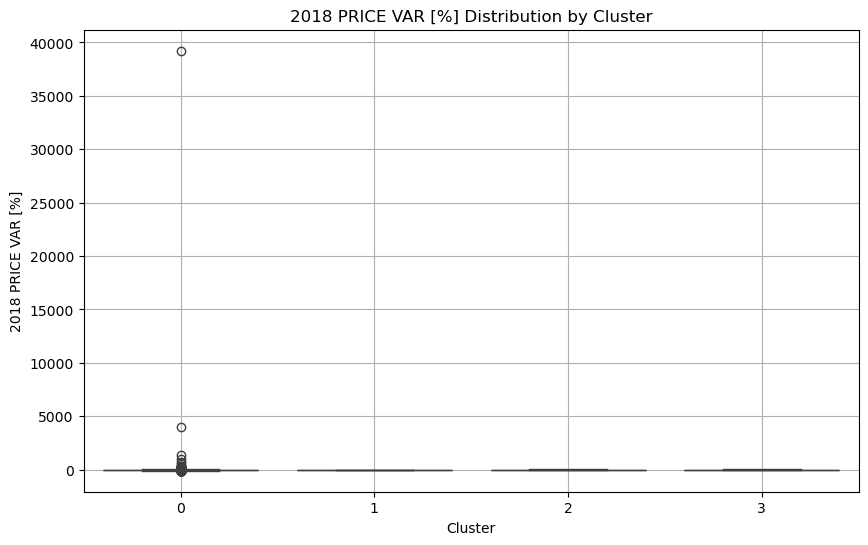

Cluster 0 Performance:
Mean: -4.27
Median: -13.49
Standard Deviation: 570.90

Cluster 1 Performance:
Mean: -8.40
Median: -8.40
Standard Deviation: nan

Cluster 2 Performance:
Mean: -15.43
Median: -16.08
Standard Deviation: 17.25

Cluster 3 Performance:
Mean: -9.36
Median: -9.64
Standard Deviation: 17.23



In [188]:
# Prepare a dictionary with cluster numbers as keys and lists of companies as values
companies_clusters = {cluster_num: clustered_data_2017[clustered_data_2017['Cluster'] == cluster_num]['Symbol'].tolist() for cluster_num in range(4)}
performance_dict = analyze_cluster_performance(clustered_data_2017, companies_clusters, 2017)

# Print performance metrics for each cluster
for cluster, performance in performance_dict.items():
    print(f"Cluster {cluster} Performance:")
    print(f"Mean: {performance['Mean']:.2f}")
    print(f"Median: {performance['Median']:.2f}")
    print(f"Standard Deviation: {performance['Standard Deviation']:.2f}")
    print()

### YEAR 2018

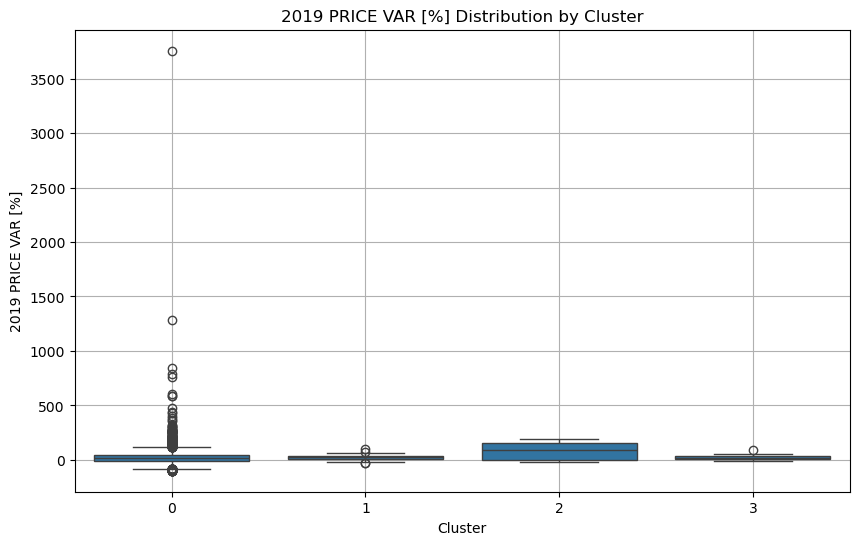

Cluster 0 Performance:
Mean: 20.66
Median: 17.10
Standard Deviation: 84.37

Cluster 1 Performance:
Mean: 22.56
Median: 22.90
Standard Deviation: 19.34

Cluster 2 Performance:
Mean: 81.75
Median: 86.50
Standard Deviation: 92.51

Cluster 3 Performance:
Mean: 21.95
Median: 19.87
Standard Deviation: 20.81



In [189]:
# Prepare a dictionary with cluster numbers as keys and lists of companies as values
companies_clusters = {cluster_num: clustered_data_2018[clustered_data_2018['Cluster'] == cluster_num]['Symbol'].tolist() for cluster_num in range(4)}
performance_dict = analyze_cluster_performance(clustered_data_2018, companies_clusters, 2018)

# Print performance metrics for each cluster
for cluster, performance in performance_dict.items():
    print(f"Cluster {cluster} Performance:")
    print(f"Mean: {performance['Mean']:.2f}")
    print(f"Median: {performance['Median']:.2f}")
    print(f"Standard Deviation: {performance['Standard Deviation']:.2f}")
    print()

# 3. Feature Engineering

## Introduction

In this section of our project, we focus on feature engineering, specifically on deriving the yearly returns of the S&P 500 index. These returns will serve as the dependent variable in our analysis, helping us assess the predictive power of financial metrics from preceding years on future stock performance relative to the market.

## Objective

The objective of this feature engineering phase is to:
- Calculate the yearly returns (percentage price change) for the S&P 500 for each year from 2015 to 2019.
- Use these returns as the dependent variable to analyze the correlation between past financial indicators and the subsequent year's stock performance relative to the S&P 500.

## Data Acquisition

We will use the `yfinance` library to download historical data for the S&P 500 index (`^GSPC`). The period of interest spans from December 31, 2014, to December 31, 2019, allowing us to calculate annual returns that are synchronized with the financial year-ends of the stocks under study.

## Methodology

1. **Downloading Data**: Fetch the historical adjusted close prices for the S&P 500 from Yahoo Finance using the `yfinance` library.
2. **Annual Returns Calculation**:
   - Resample the data to obtain the closing price on the last trading day of each year.
   - Calculate the percentage change in these closing prices year-over-year to derive the annual returns.
3. **Alignment with Financial Metrics**:
   - Align these annual returns with the financial data from the end of each previous year (2014-2018). This alignment ensures that each return value from 2015 to 2019 corresponds to financial metrics from the end of 2014 to 2018, respectively.

## Expected Outcomes

This feature engineering step will provide us with a well-defined dependent variable, representing the S&P 500 yearly returns. By correlating these returns with the financial metrics of stocks from the previous years, we aim to uncover significant predictors of stock performance relative to the broader market.


In [190]:
import yfinance as yf

# Define the ticker symbol for the S&P 500
ticker_symbol = "^GSPC"

# Set the start and end dates for each year-end closing from 2014 to 2018
start_date = "2014-12-31"
end_date = "2023-12-31"

# Download the historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate the yearly close by resampling to annual frequency at year-end
# The 'Y' frequency here will ensure that it picks the last trading day of each calendar year
yearly_data = data['Adj Close'].resample('YE').last()

# Calculate the yearly returns
sp_yearly_returns = yearly_data.pct_change().dropna() * 100

# The yearly returns should not be offset by -1 year in the index for your needs,
# because we want the financial year data of 2014 (ending in 2014) to predict the gains in 2015, and so on
# The index should just be adjusted to correspond to the years where the returns are applicable
sp_yearly_returns.index = sp_yearly_returns.index.year

# Print the yearly returns
sp_yearly_returns

[*********************100%%**********************]  1 of 1 completed


Date
2015    -0.726600
2016     9.535023
2017    19.419966
2018    -6.237260
2019    28.878070
2020    16.258923
2021    26.892739
2022   -19.442827
2023    24.230501
Name: Adj Close, dtype: float64

## Calculation of Stock Alphas Relative to S&P 500

### Introduction

In this section, we will calculate the alpha for each stock in our dataset for the years 2015 to 2018. Alpha measures the performance of a stock relative to a benchmark, which in this case is the S&P 500. A positive alpha indicates that the stock has outperformed the benchmark, while a negative alpha indicates underperformance.

### Objective

The objective of this analysis is to determine how much each stock over- or under-performed relative to the S&P 500. This insight can help identify stocks that might offer better returns compared to the market.

### Methodology

We calculate alpha using the formula:
alpha = {Stock Return} - {S&P 500 Return}
Where:
- **Stock Return** is the percentage price variation of the stock for the year.
- **S&P 500 Return** is the return of the S&P 500 index for the corresponding year.

### Execution

We will add a new column for alpha for each year from 2014 to 2018, using the yearly returns of the S&P 500 and the stock's performance from the previous year's dataset.

In [191]:
def create_alphas(all_datasets, yearly_returns, year_start):
    """
    Updates the datasets with alpha values computed as the difference between 
    the price variation and yearly returns of the S&P 500.

    Parameters:
    - all_datasets: Dictionary of pandas DataFrames containing the yearly data.
    - yearly_returns: Dictionary containing yearly returns of the S&P 500.
    - year_start: The starting year for the datasets.
    
    Returns:
    - updated_datasets: Dictionary of updated DataFrames with alpha columns added.
    """
    updated_datasets = {}

    for year, data in all_datasets.items():
        year_int = int(year)
        price_var_col = f'{year_int + 1} PRICE VAR [%]'
        alpha_col = f'Alpha_{year_int + 1}'
        
        if price_var_col in data.columns:
            data[alpha_col] = data[price_var_col] - yearly_returns[year_int + 1]
        
        # Add the updated DataFrame to the dictionary
        updated_datasets[year] = data
        
        # Print the updated DataFrame to verify the new alpha column
        print(data[['Symbol', price_var_col, alpha_col]].head(1))
    
    return updated_datasets

year_start = 2014

updated_datasets = create_alphas(all_datasets, sp_yearly_returns, year_start)


  Symbol  2015 PRICE VAR [%]  Alpha_2015
0     PG           -9.323276   -8.596676
  Symbol  2016 PRICE VAR [%]  Alpha_2016
0     PG           10.809451    1.274429
  Symbol  2017 PRICE VAR [%]  Alpha_2017
0     PG           12.532463   -6.887503
  Symbol  2018 PRICE VAR [%]  Alpha_2018
0     PG            4.975151   11.212411
  Symbol  2019 PRICE VAR [%]  Alpha_2019
0  CMCSA           32.794573    3.916503


## Visualizing Stocks Outperforming the S&P 500

### Let's visualize our findings using the dependent variable

We will visualize the stocks that have outperformed the S&P 500 by year. Specifically, we will look at the top and bottom performers in terms of alpha, which measures the performance of each stock relative to the S&P 500. 

### Function Definition

The `plot_alphas` function is designed to plot the alphas for a given year, highlighting the top and bottom performers. The function takes the following parameters:
- `data`: The dataset containing the stock information and calculated alphas.
- `year`: The year for which to plot the alphas.
- `top_n`: The number of top-performing stocks to display (default is 10).
- `bottom_n`: The number of bottom-performing stocks to display (default is 10).

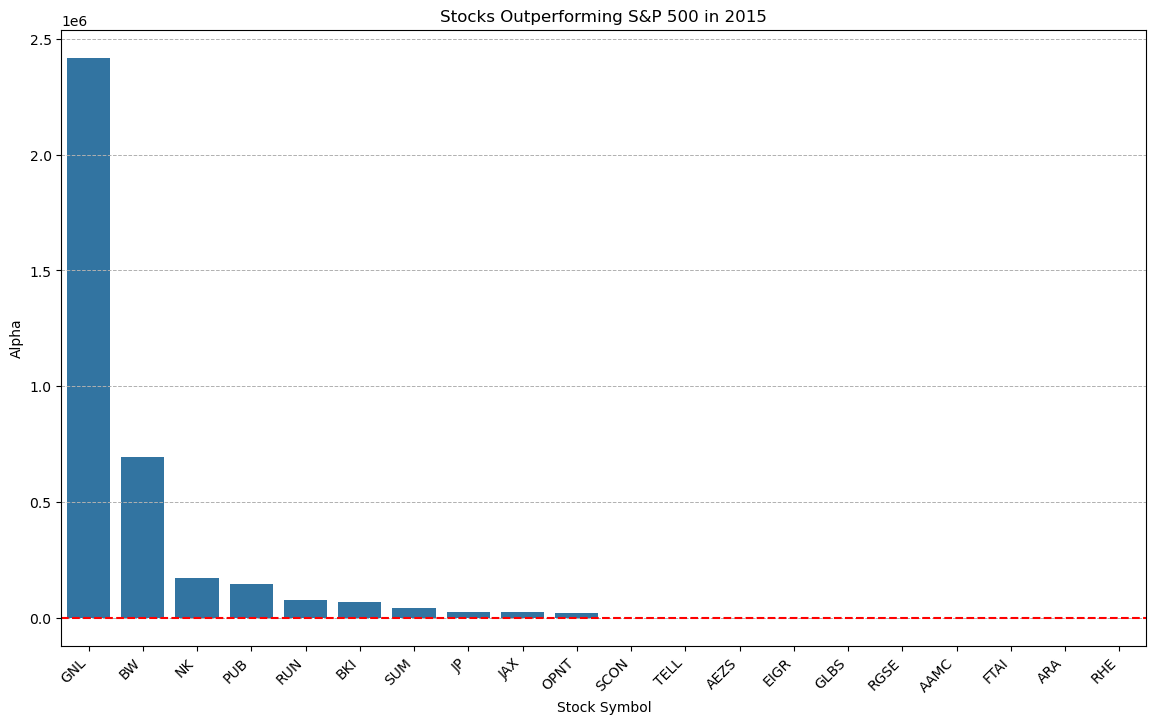

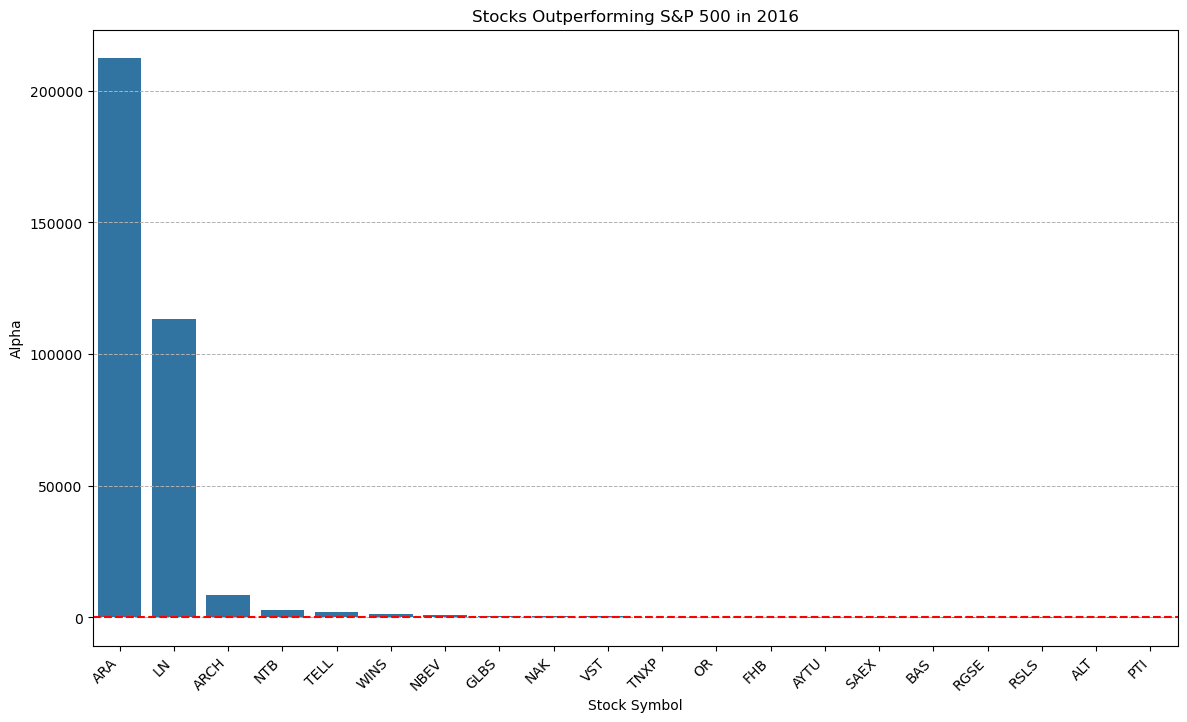

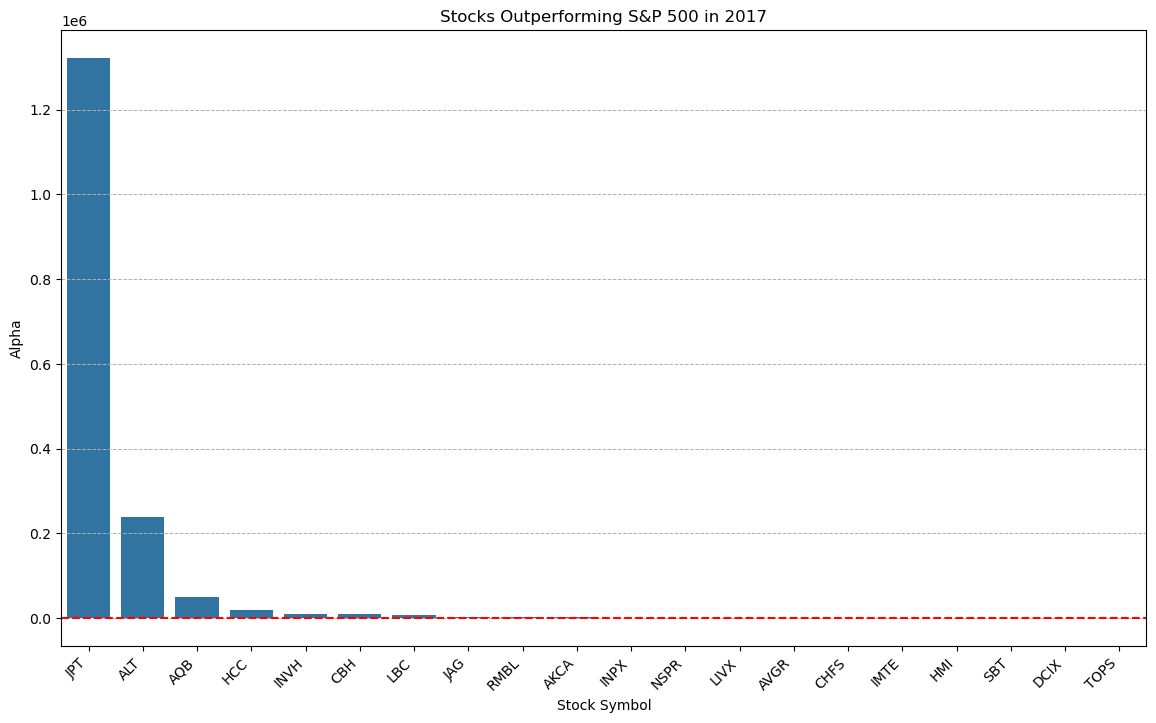

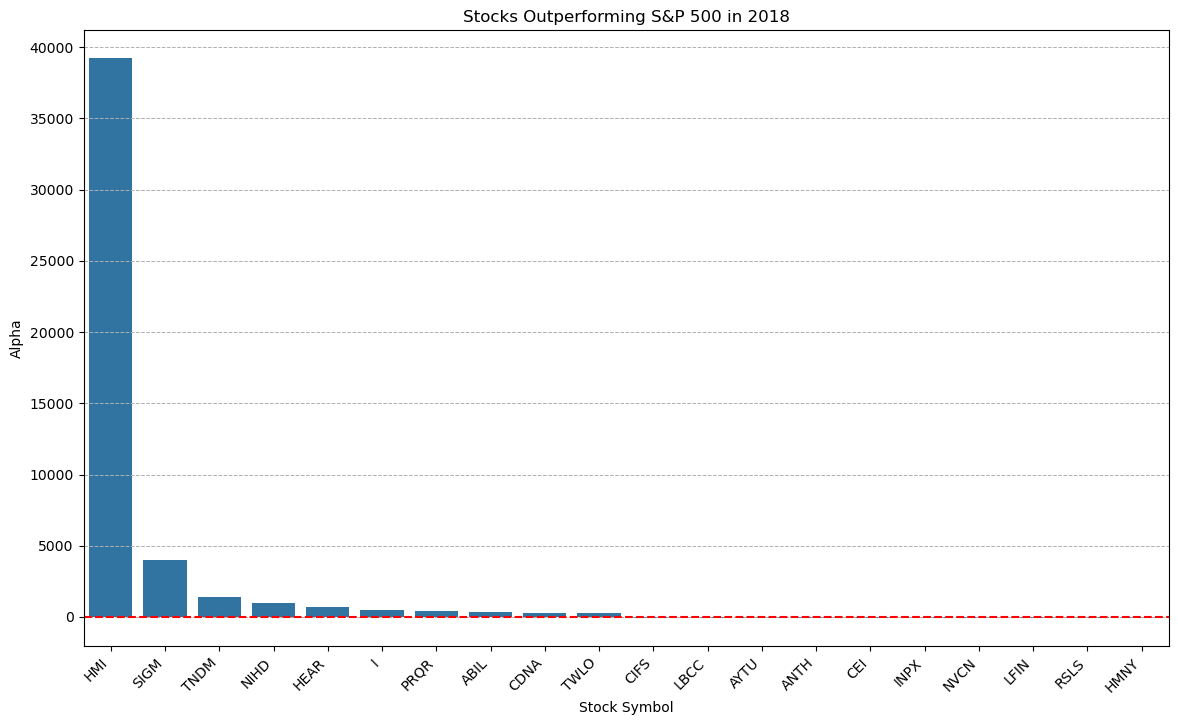

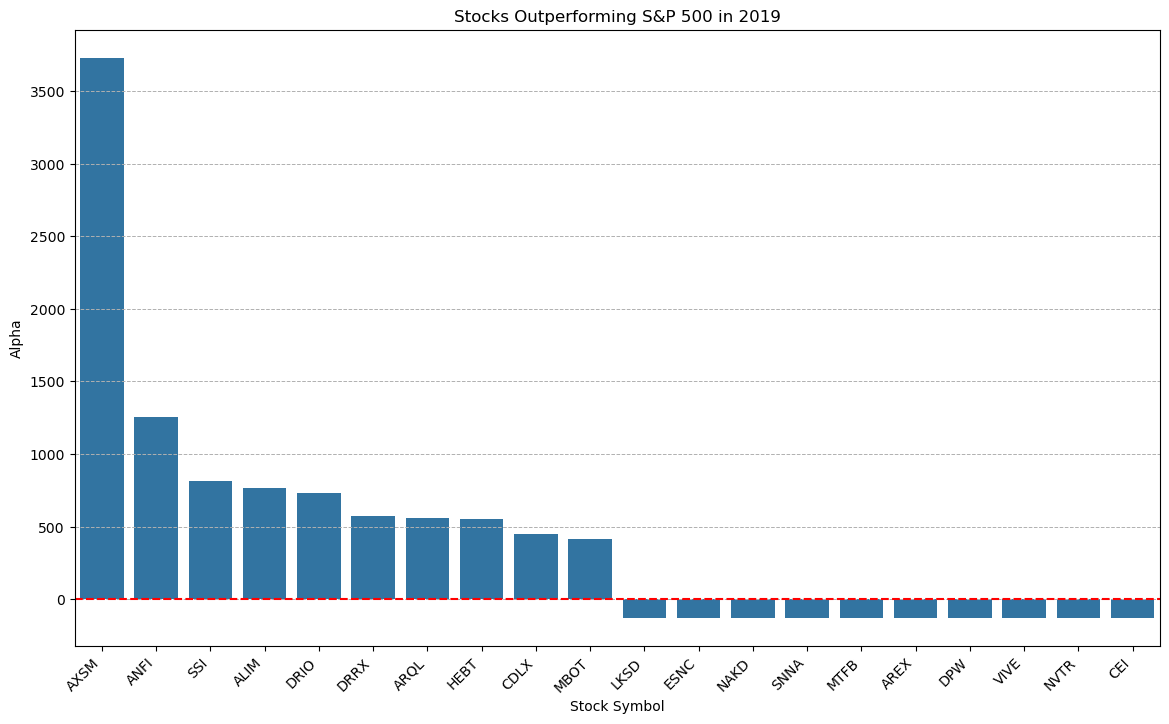

In [192]:
# Function to plot alphas for a given year with parameter for top and bottom records
def plot_alphas(data, year, top_n=10, bottom_n=10):
    alpha_col = f'Alpha_{year}'
    plt.figure(figsize=(14, 8))
    
    # Sort data by alpha
    data_sorted = data.sort_values(by=alpha_col, ascending=False)
    
    # Select top and bottom performers
    top_bottom = pd.concat([data_sorted.head(top_n), data_sorted.tail(bottom_n)])
    
    sns.barplot(x='Symbol', y=alpha_col, data=top_bottom)
    plt.title(f'Stocks Outperforming S&P 500 in {year}')
    plt.xlabel('Stock Symbol')
    plt.ylabel('Alpha')
    plt.axhline(0, color='red', linestyle='--')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
    plt.show()

# Plot alphas for each year with default top 10 and bottom 10
plot_alphas(data_2014, 2015, top_n=10, bottom_n=10)
plot_alphas(data_2015, 2016, top_n=10, bottom_n=10)
plot_alphas(data_2016, 2017, top_n=10, bottom_n=10)
plot_alphas(data_2017, 2018, top_n=10, bottom_n=10)
plot_alphas(data_2018, 2019, top_n=10, bottom_n=10)

### Just for curiosity let's see how many stocks outperform the S&P500 in the year of study

In [193]:
data_2014[data_2014['Alpha_2015']>0].shape[0]

1665

In [194]:
data_2015[data_2015['Alpha_2016']>0].shape[0]

2424

In [195]:
data_2016[data_2016['Alpha_2017']>0].shape[0]

1803

In [196]:
data_2017[data_2017['Alpha_2018']>0].shape[0]

1866

In [197]:
data_2018[data_2018['Alpha_2019']>0].shape[0]

1595

### Let's change the column name 2014 price var and alpha_2014 for something that contain all the datasets

In [198]:
datasets = [data_2014, data_2015, data_2016, data_2017, data_2018]

# Rename columns dynamically based on the year
for i, df in enumerate(datasets):
    year = 2014 + i
    df.rename(columns={f'{year + 1} PRICE VAR [%]': 'PRICE VAR [%]', f'Alpha_{year + 1}': 'Alpha'}, inplace=True)
    
data_2015.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense', 'Earnings before Tax',
       ...
       'Asset Growth', 'Book Value per Share Growth', 'Debt Growth',
       'R&D Expense Growth', 'SG&A Expenses Growth', 'PRICE VAR [%]', 'Symbol',
       'Sector', 'Cluster', 'Alpha'],
      dtype='object', length=183)

### Now let's create binary dependent variables:

1. Creates a new column Alpha_gt_3 where the value is 1 if Alpha is greater than 3% (0.03), and 0 otherwise.

2. Creates a new column Alpha_gt_minus5 where the value is 1 if Alpha is greater than -5% (-0.05), and 0 otherwise.
 
3. Creates a new column Alpha_gt_10 where the value is 1 if Alpha is greater than 10% (0.10), and 0 otherwise.

In [199]:
def create_binary_variables(df):
    df['Alpha_gt_3'] = df['Alpha'].apply(lambda x: 1 if x > 3 else 0)
    df['Alpha_gt_5'] = df['Alpha'].apply(lambda x: 1 if x > 5 else 0)
    df['Alpha_gt_10'] = df['Alpha'].apply(lambda x: 1 if x > 10 else 0)
    return df

updated_datasets = [create_binary_variables(df) for df in datasets]

In [200]:
data_2015.Alpha_gt_3.dtype

dtype('int64')

### Let's add the year for each dataset

In [201]:
datasets = [data_2014, data_2015, data_2016, data_2017, data_2018]
years = [2014, 2015, 2016, 2017, 2018]

# Adding the year column to each dataset
for dataset, year in zip(datasets, years):
    dataset['Year'] = year

### Let's create dummie variables for sector

In [202]:
# Create dummy features for the 'Sector' column
for i in range(len(datasets)):
    # Create dummy variables
    datasets[i] = pd.get_dummies(datasets[i], columns=['Sector'], drop_first=True)
    # Convert boolean columns to integers
    bool_cols = datasets[i].select_dtypes(include='bool').columns
    datasets[i][bool_cols] = datasets[i][bool_cols].astype(int)

### Let's combine datasets for modeling and save it to csv


In [203]:
# Combine datasets for processing
combined_data = pd.concat(datasets).reset_index(drop=True)

In [204]:
# # Save to CSV with outliers
# combined_data.to_csv('../data/modeling_data/with_outliers.csv', index=False)
# print('Dataset saved successfully.')

In [205]:
# # Save to CSV cap outliers
# combined_data.to_csv('../data/modeling_data/cap_outliers.csv', index=False)
# print('Dataset saved successfully.')

In [206]:
# Save to CSV drop outliers
combined_data.to_csv('../data/modeling_data/drop_outliers.csv', index=False)
print('Dataset saved successfully.')

Dataset saved successfully.


In [207]:
combined_data.columns.tolist()

['Revenue',
 'Revenue Growth',
 'Cost of Revenue',
 'Gross Profit',
 'R&D Expenses',
 'SG&A Expense',
 'Operating Expenses',
 'Operating Income',
 'Interest Expense',
 'Earnings before Tax',
 'Income Tax Expense',
 'Net Income - Non-Controlling int',
 'Net Income',
 'Net Income Com',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'Gross Margin',
 'EBITDA Margin',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'EBITDA',
 'EBIT',
 'Consolidated Income',
 'Earnings Before Tax Margin',
 'Net Profit Margin',
 'Cash and cash equivalents',
 'Short-term investments',
 'Cash and short-term investments',
 'Receivables',
 'Inventories',
 'Total current assets',
 'Property, Plant & Equipment Net',
 'Goodwill and Intangible Assets',
 'Long-term investments',
 'Tax assets',
 'Total assets',
 'Payables',
 'Short-term debt',
 'Total current liabilities',
 'Long-term debt',
 'Total debt',
 'Deferred revenue',
 'Tax Liabilities',
 'Total liabilitie